In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


import warnings 
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

In [3]:
pd.read_csv("Housing.csv")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Read Data 

In [4]:
 df = pd.read_csv("Housing.csv")

In [5]:
# Dataset info
print("\n===== Dataset Info =====")
print(df.info())


===== Dataset Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


# EDA

In [6]:
# Summary statistics
print("\n===== Summary Statistics =====")
display(df.describe(include="all").transpose())


===== Summary Statistics =====


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [7]:
# Check for missing values
print("\n===== Missing Values =====")
print(df.isnull().sum())


===== Missing Values =====
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
df.duplicated().sum()

np.int64(0)

In [14]:
numeric_cols=[]
cat_cols=[]
price_col=df.price
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"The column '{column}' is numeric.")
        numeric_cols.append(column)
    else:
        print(f"The column '{column}' is not numeric.")
        cat_cols.append(column)

The column 'price' is numeric.
The column 'area' is numeric.
The column 'bedrooms' is numeric.
The column 'bathrooms' is numeric.
The column 'stories' is numeric.
The column 'mainroad' is not numeric.
The column 'guestroom' is not numeric.
The column 'basement' is not numeric.
The column 'hotwaterheating' is not numeric.
The column 'airconditioning' is not numeric.
The column 'parking' is numeric.
The column 'prefarea' is not numeric.
The column 'furnishingstatus' is not numeric.


In [15]:
print(numeric_cols)
print(cat_cols)

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


# Visualization

In [16]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

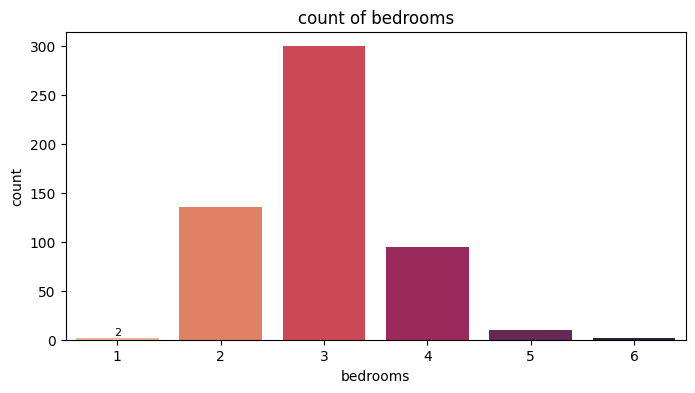

In [22]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x=bedrooms_count.index, y=bedrooms_count.values,palette="rocket_r")
ax.bar_label(ax.containers[0], fontsize=8);
plt.title('count of bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('count')
plt.show()

In [23]:
count_bathrooms = df['bathrooms'].value_counts()
count_bathrooms

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

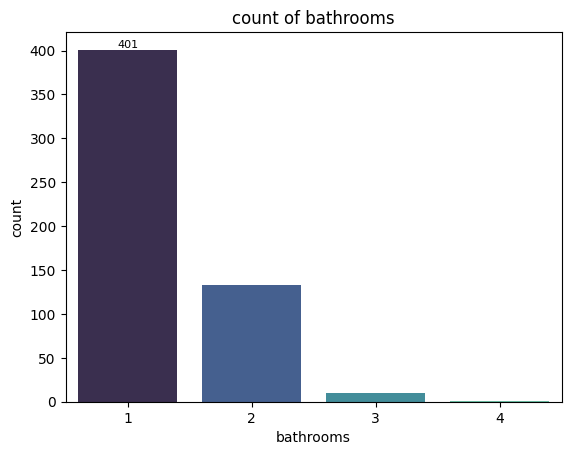

In [24]:
ax = sns.barplot(x=count_bathrooms.index,y=count_bathrooms.values,palette="mako")
ax.bar_label(ax.containers[0], fontsize=8);
plt.title('count of bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('count')
plt.show()

In [25]:
stories_count = df['stories'].value_counts()
stories_count

stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64

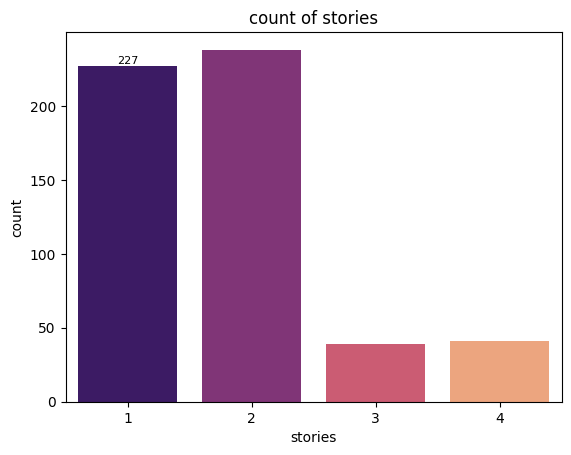

In [26]:
ax = sns.barplot(x=stories_count.index,y=stories_count.values,palette="magma")
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('count of stories')
plt.xlabel('stories')
plt.ylabel('count')
plt.show()

In [28]:
furnishingstatus_count = df.furnishingstatus.value_counts()
furnishingstatus_count

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

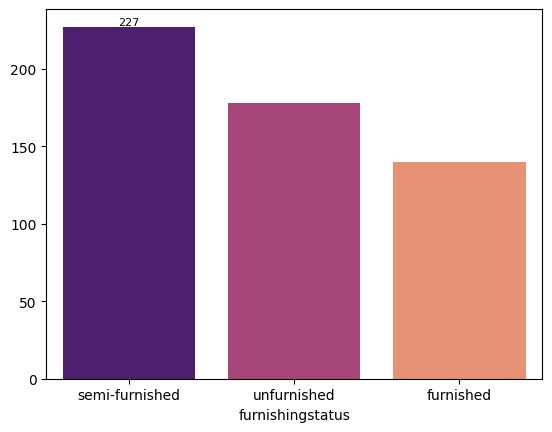

In [29]:
ax = sns.barplot(x=furnishingstatus_count.index,
                 y=furnishingstatus_count.values,
                 palette="magma"
                
                )
ax.bar_label(ax.containers[0], fontsize=8)
plt.show()

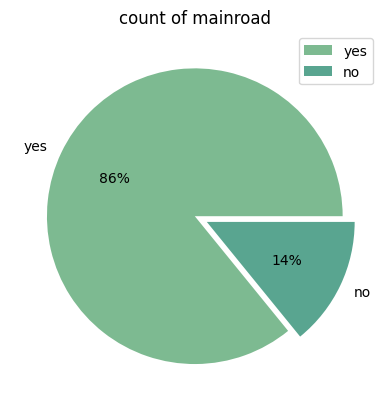

In [27]:
count_mainroad=df['mainroad'].value_counts()
count_mainroad

explode = [0, 0.09]
colors = sns.color_palette("crest")
plt.pie(count_mainroad.values, 
        labels=count_mainroad.index, 
        autopct='%.0f%%',explode=explode, 
        colors = colors) 
plt.title("count of mainroad")
plt.legend(loc = "best")

plt.show()

Univariate Analysis

In [30]:
def univariate_analysis_numeric(col):
    fig, ax = plt.subplots(1, 3, figsize=(10,5))    
    sns.histplot(df[col], kde=True, bins=20, color='skyblue',ax=ax[0])
    ax[0].set_title(f'Histogram of {col} .')
    
    sns.boxplot(x=df[col],ax=ax[1])
    ax[1].set_title(f'Boxplot diagram of {col}')
    
    sns.violinplot(x=df[col],ax=ax[2])
    ax[2].set_title(f'Violinplot diagram of {col}')
    plt.show()

 Univariate analysis for price column:


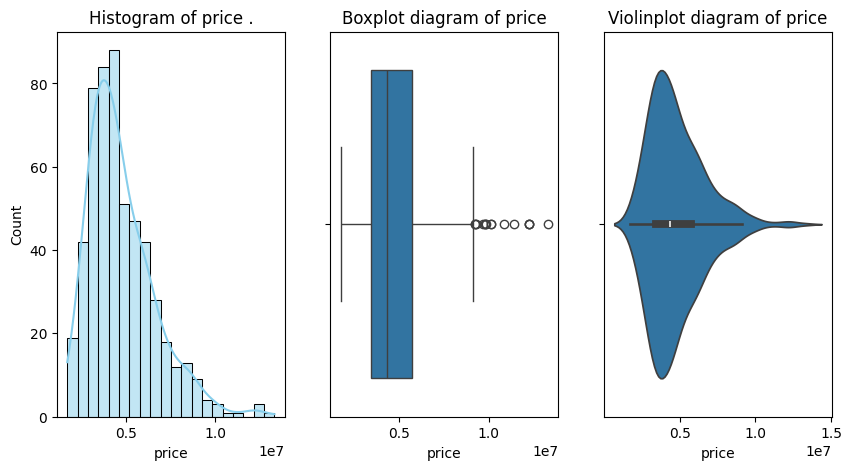

 Univariate analysis for area column:


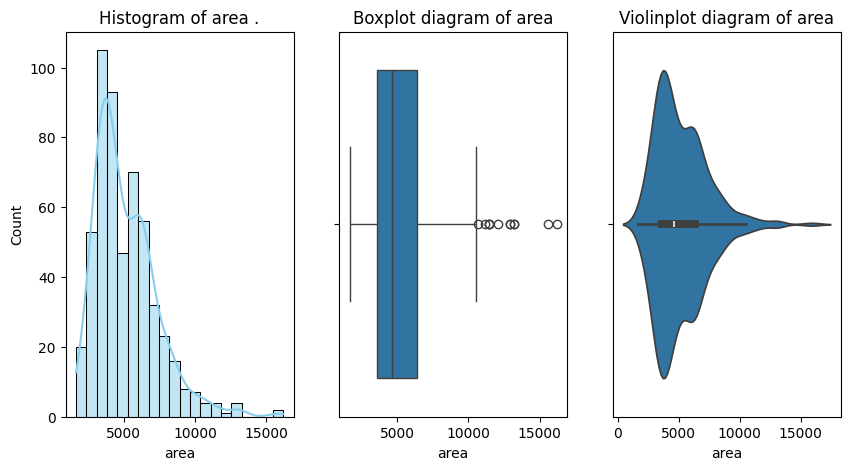

 Univariate analysis for bedrooms column:


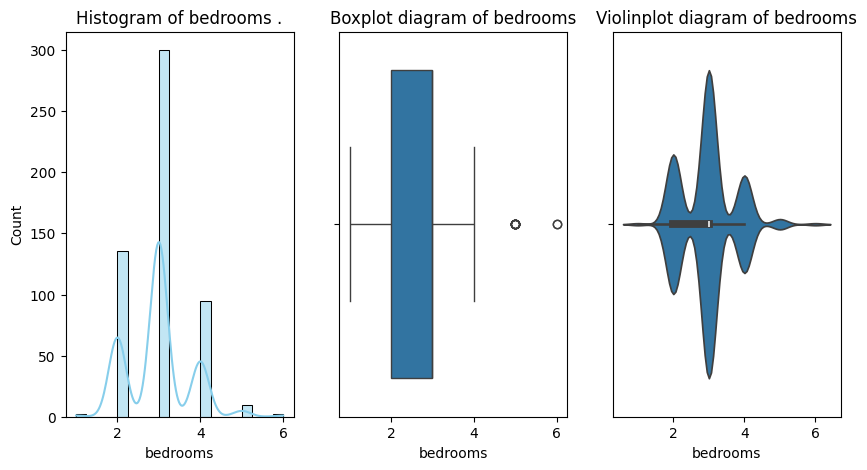

 Univariate analysis for bathrooms column:


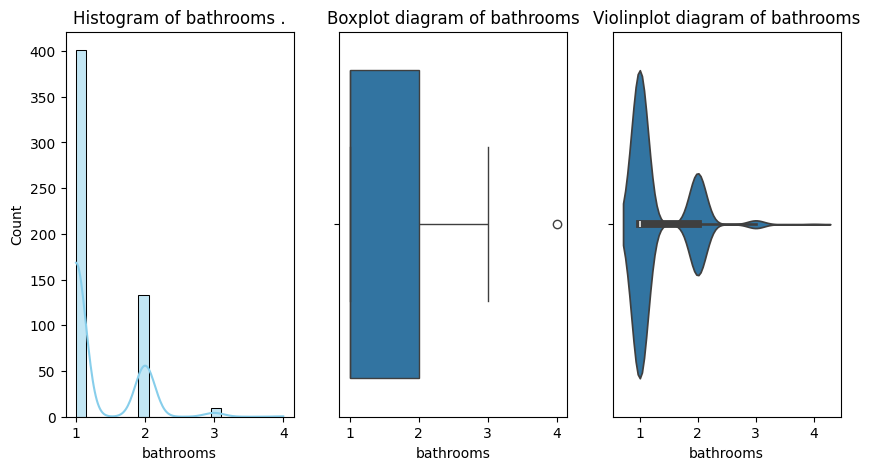

 Univariate analysis for stories column:


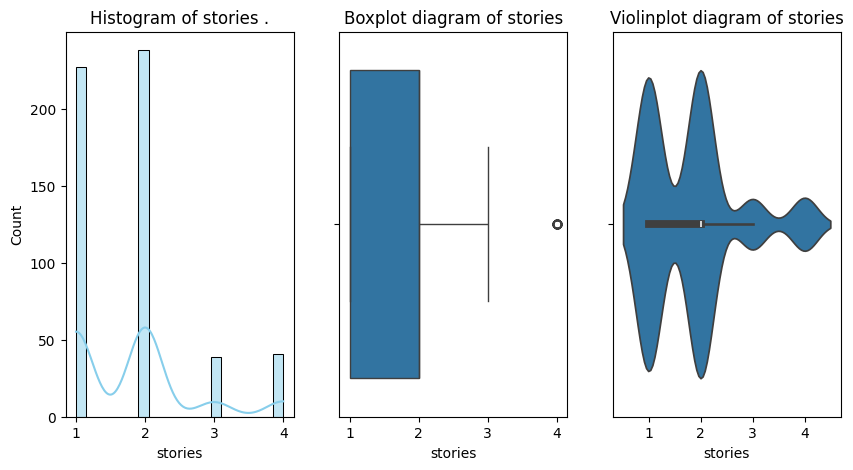

 Univariate analysis for parking column:


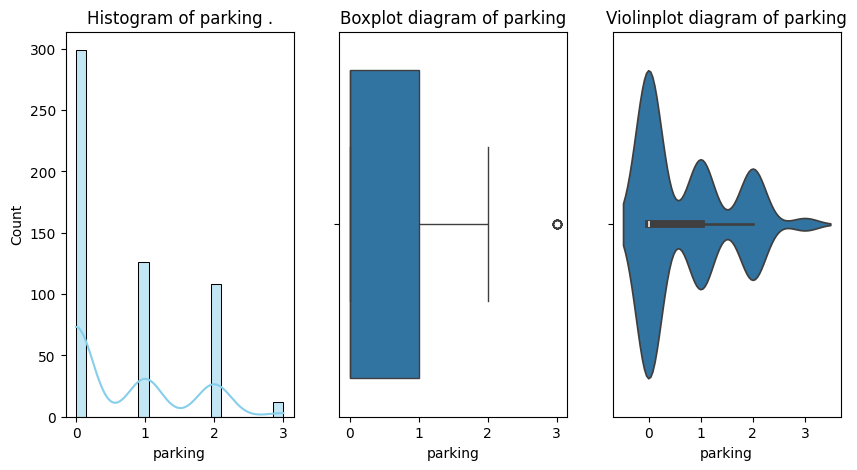

In [31]:
for col in numeric_cols:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_numeric(col)

In [32]:
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Countplot
    sns.countplot(data=df,x=df[col], palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')
    
    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')
    
    plt.show()

 Univariate analysis for mainroad column:


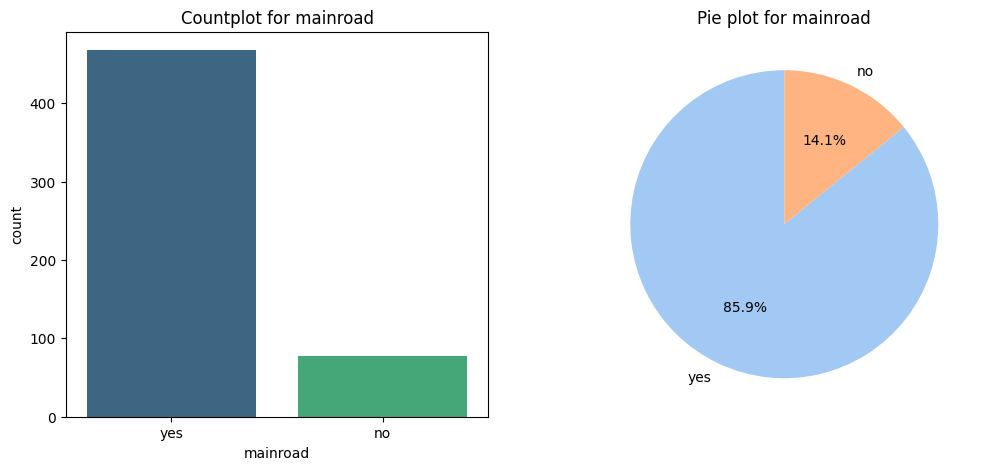

 Univariate analysis for guestroom column:


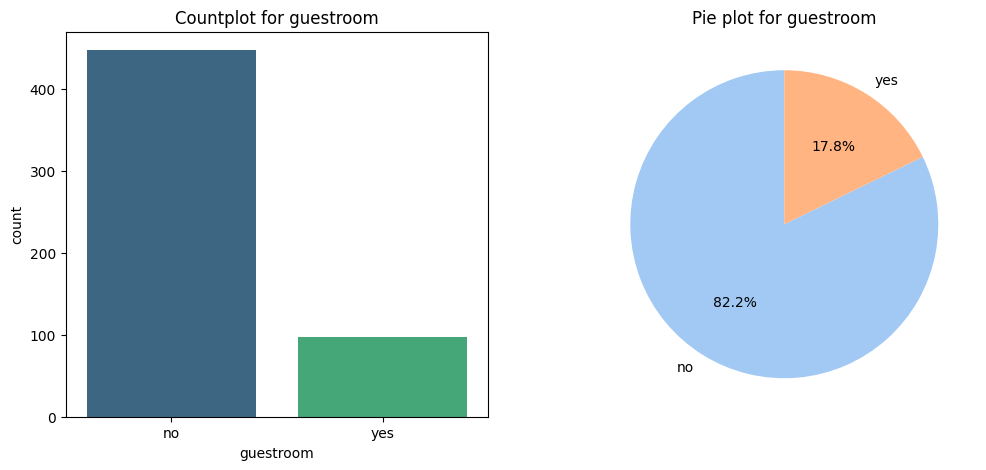

 Univariate analysis for basement column:


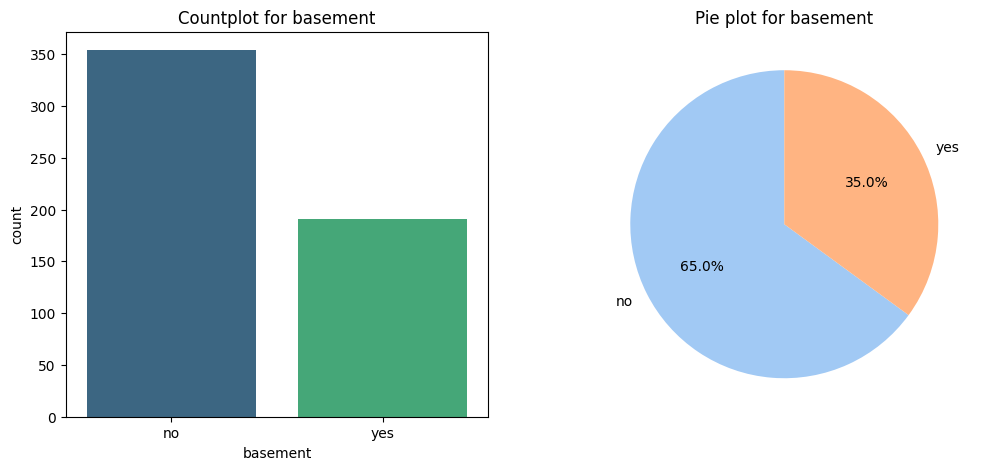

 Univariate analysis for hotwaterheating column:


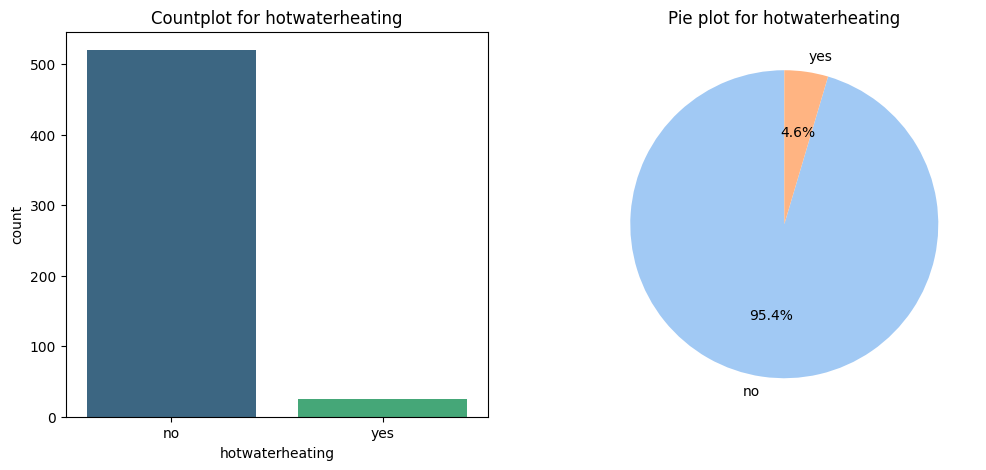

 Univariate analysis for airconditioning column:


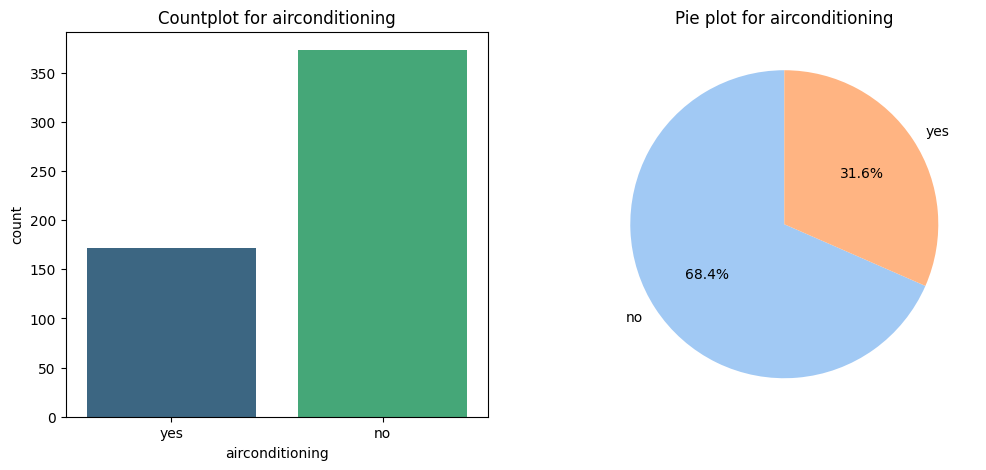

 Univariate analysis for prefarea column:


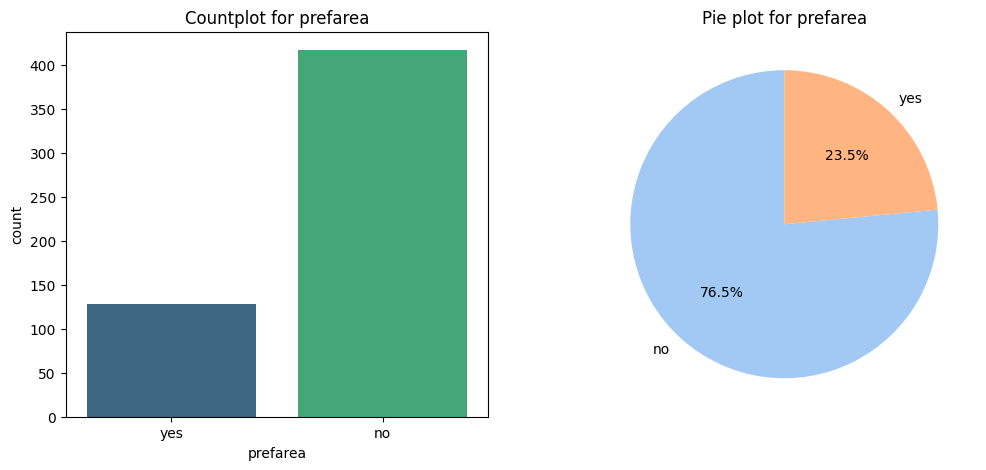

 Univariate analysis for furnishingstatus column:


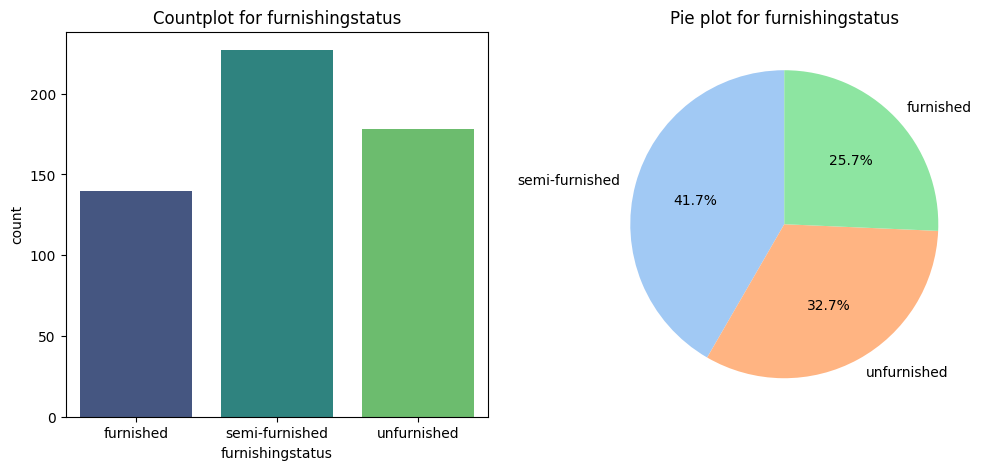

In [33]:
for col in cat_cols:
    print(f' Univariate analysis for {col} column:')
    univariate_analysis_cat(col)

Bivariate Analysis

In [34]:
def bivariate_num_col(col):
     # Set the color palette
    sns.set_palette("tab10")
    
    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    # reg plot
    sns.regplot(x=df[col], y=df['price'], ax=ax[0])
    ax[0].set_title(f'Regression Plot: {col} vs Price')

    # Scatter plot
    sns.scatterplot(x=col, y='price', data=df, ax=ax[1])
    ax[1].set_title(f'Scatter Plot of {col} vs price')
    

    plt.tight_layout()
    plt.show()

Bivariate analysis between area and price


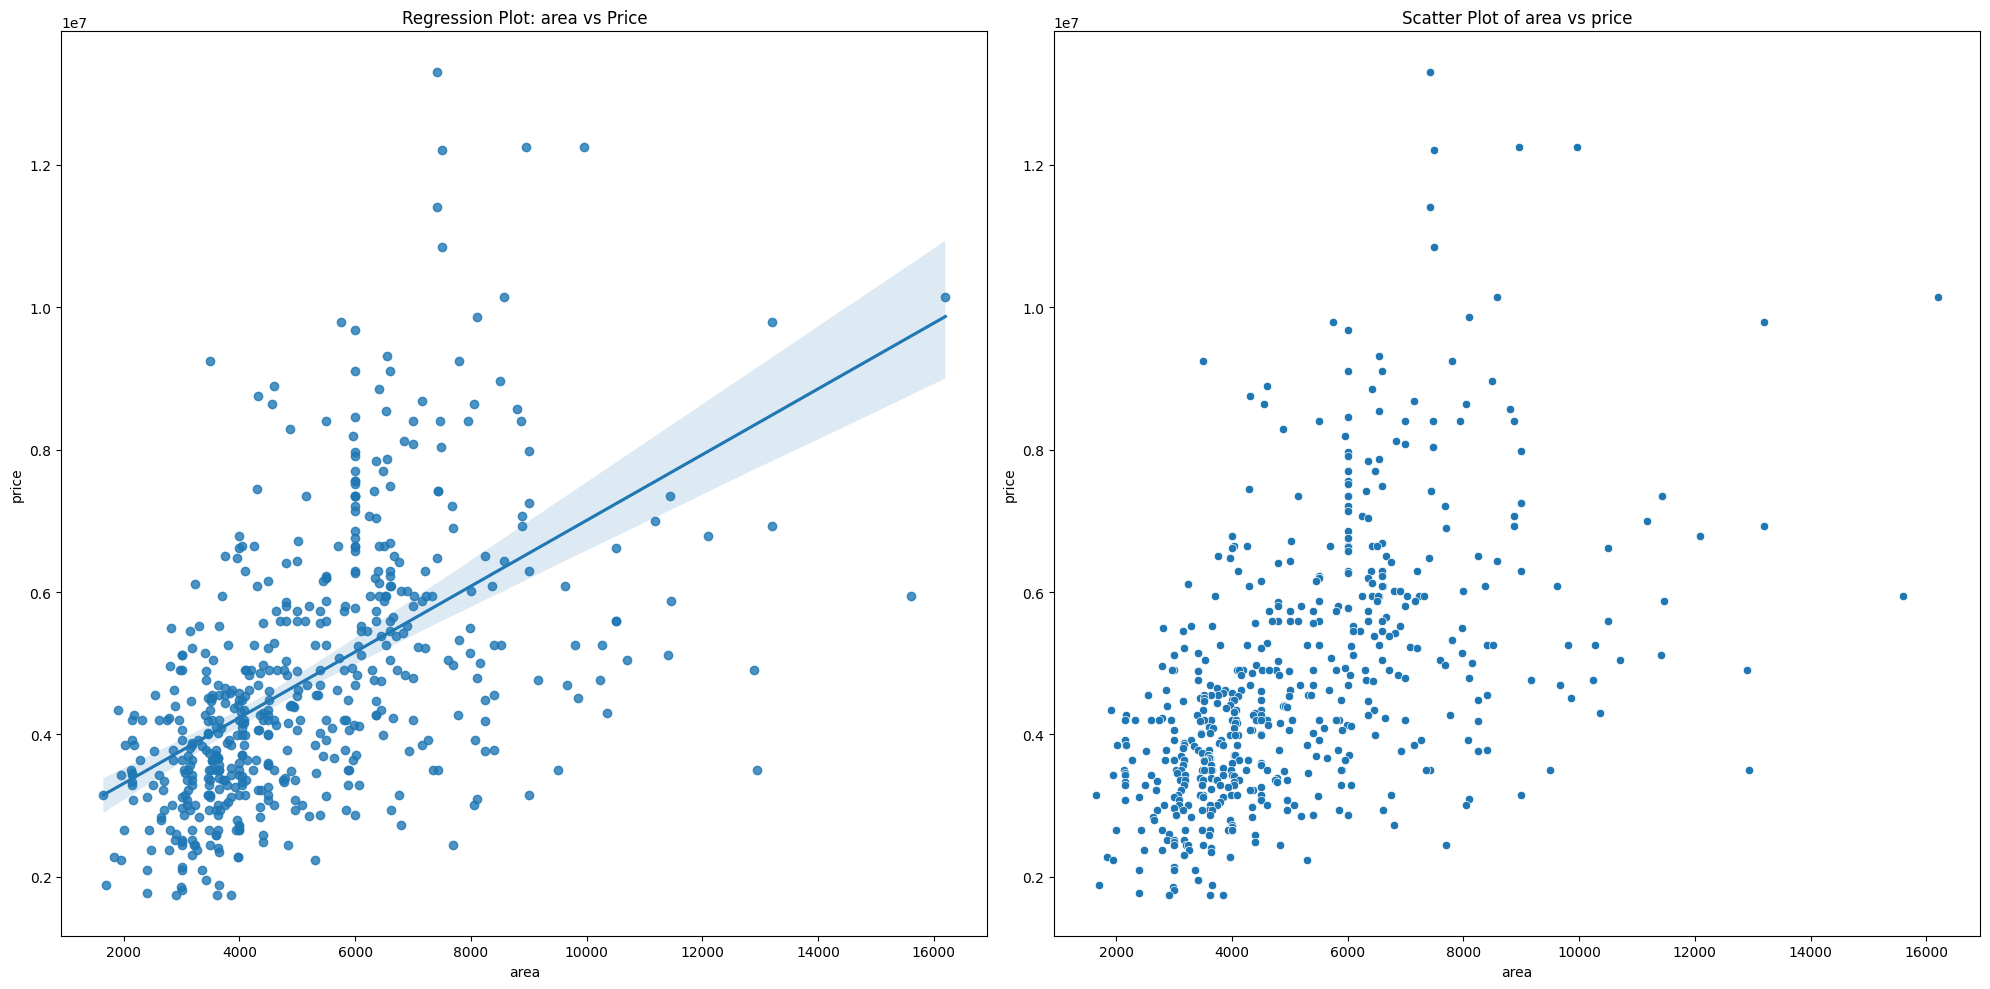

Bivariate analysis between bedrooms and price


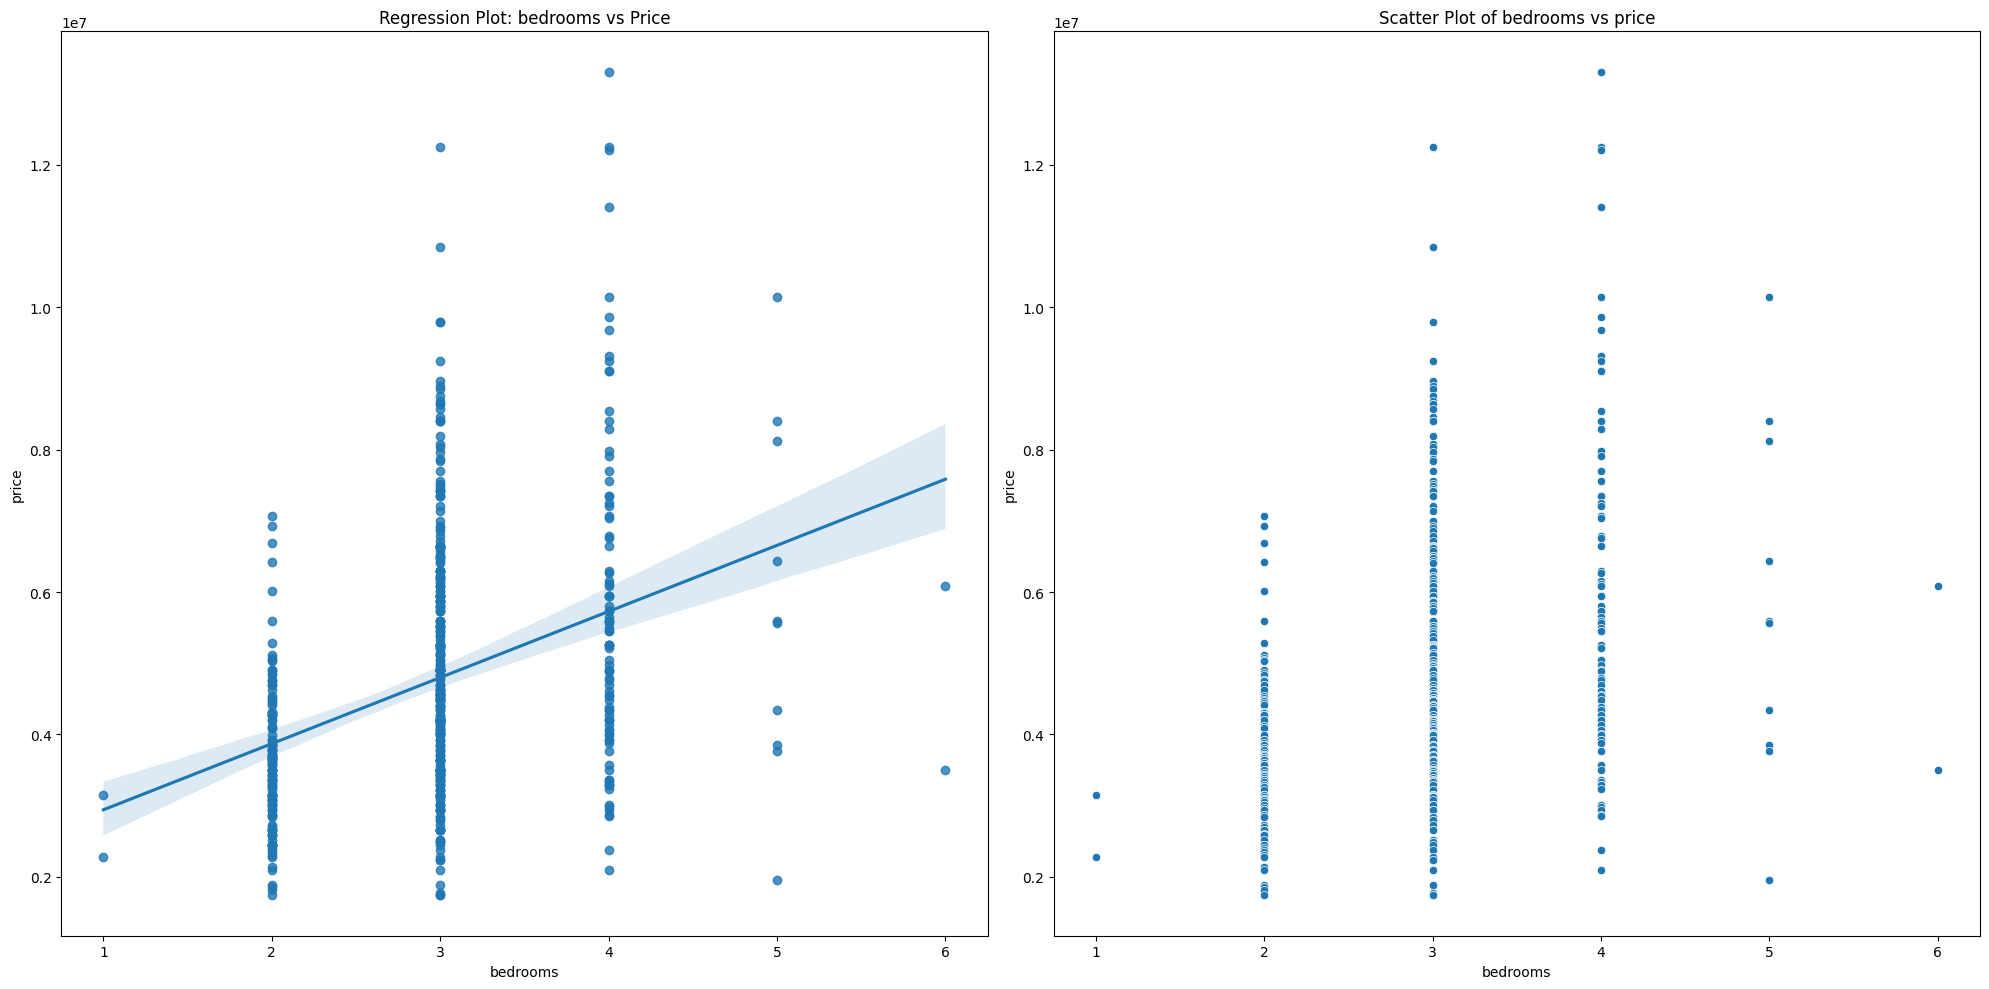

Bivariate analysis between bathrooms and price


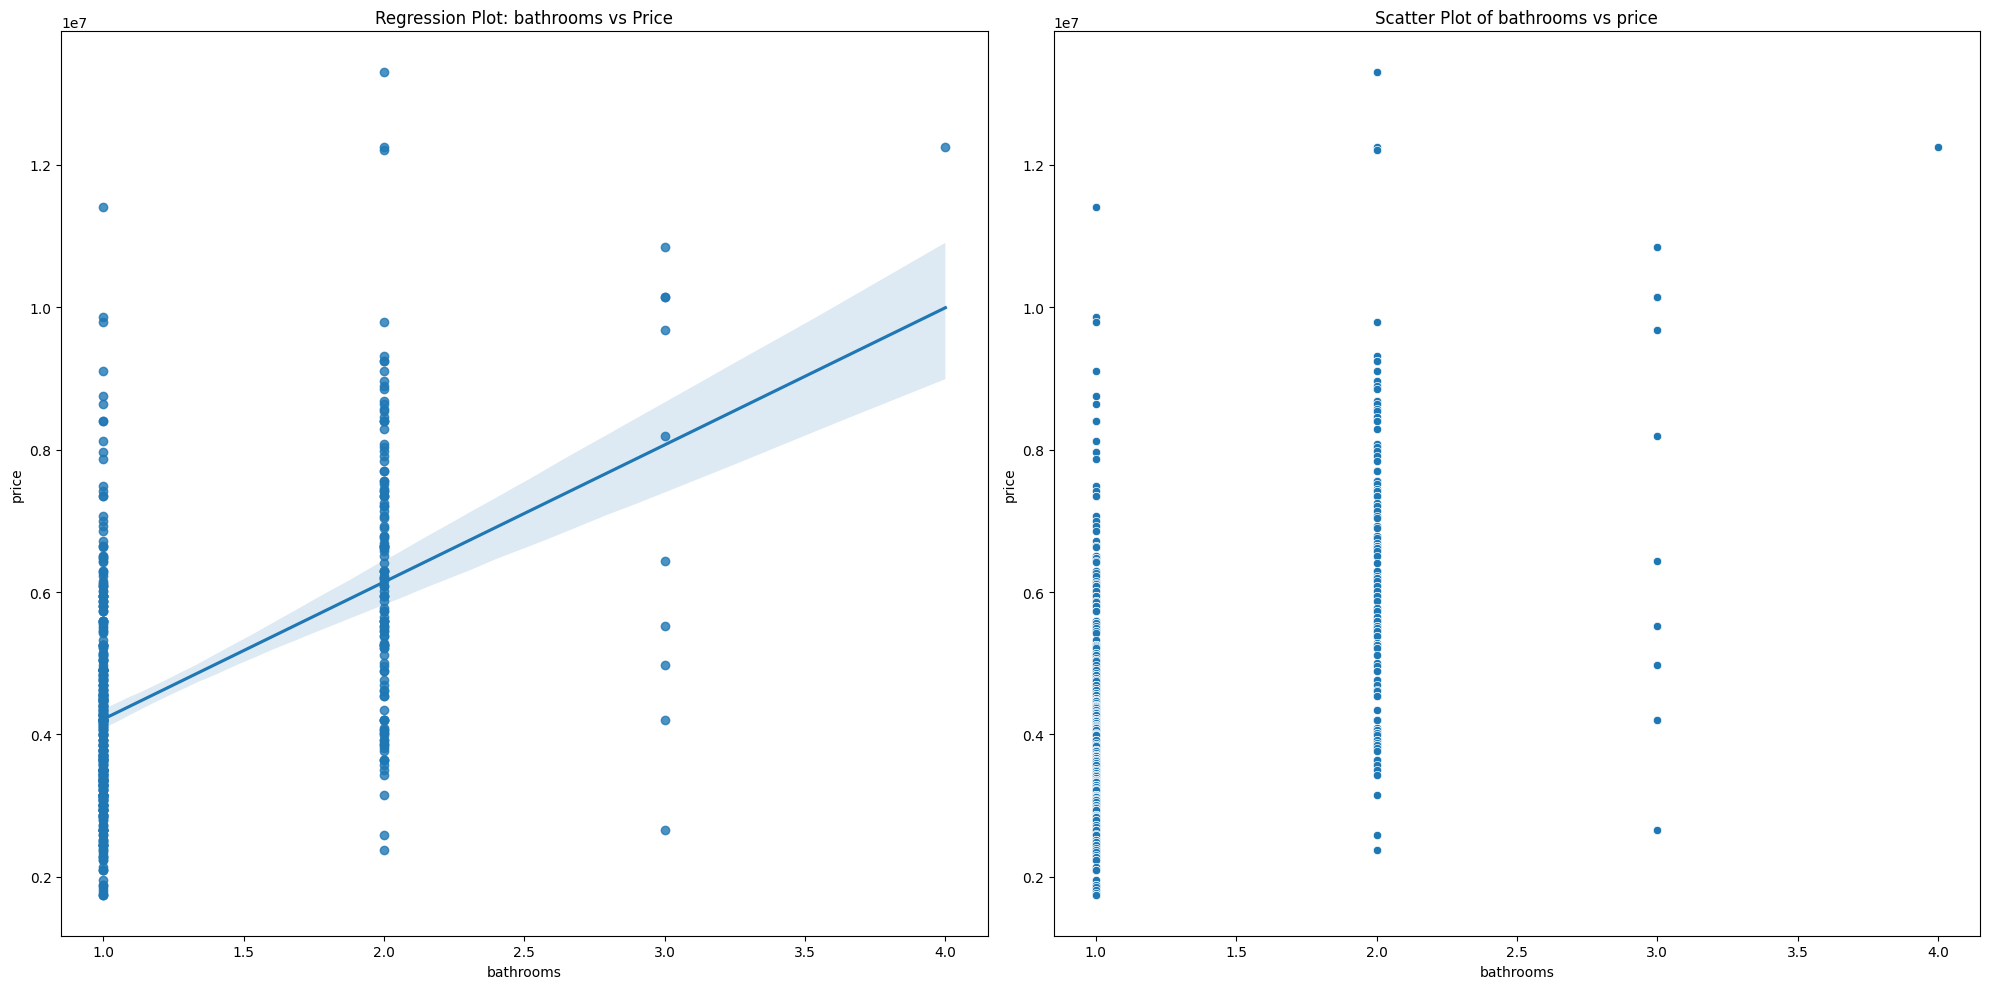

Bivariate analysis between stories and price


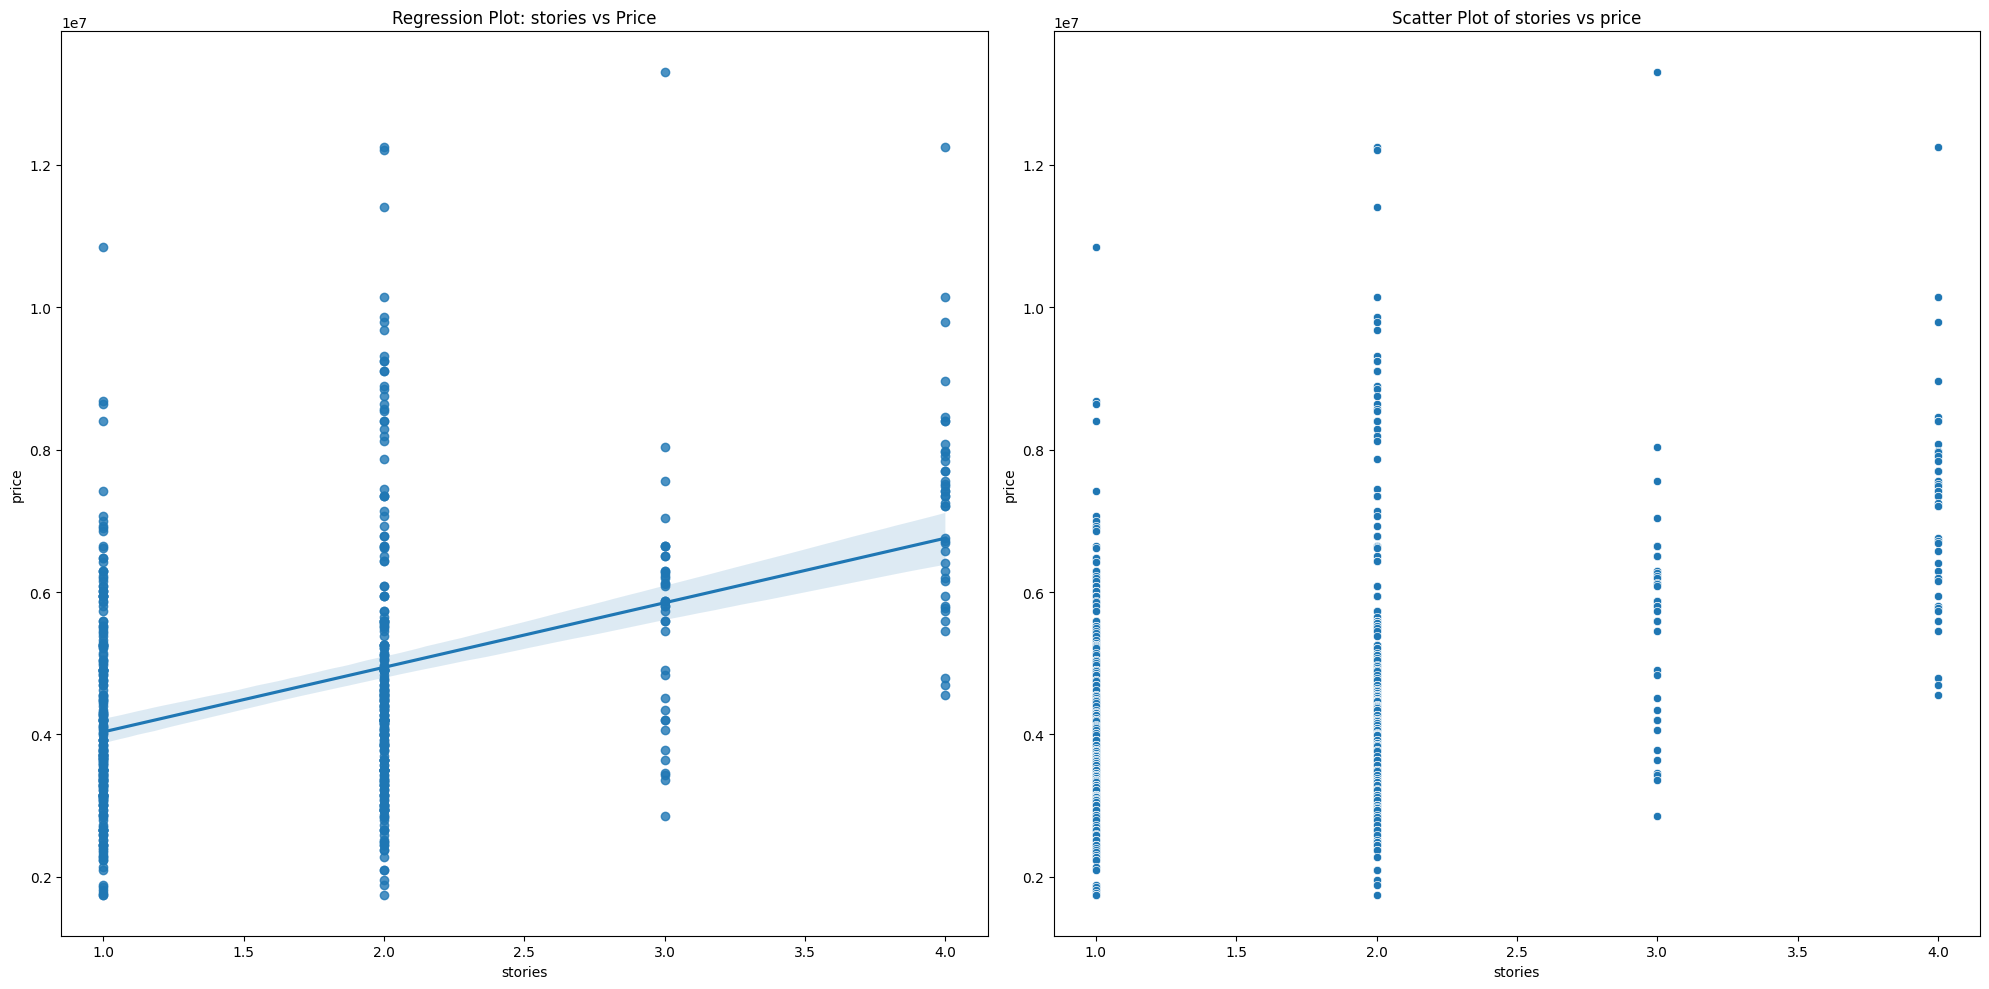

Bivariate analysis between parking and price


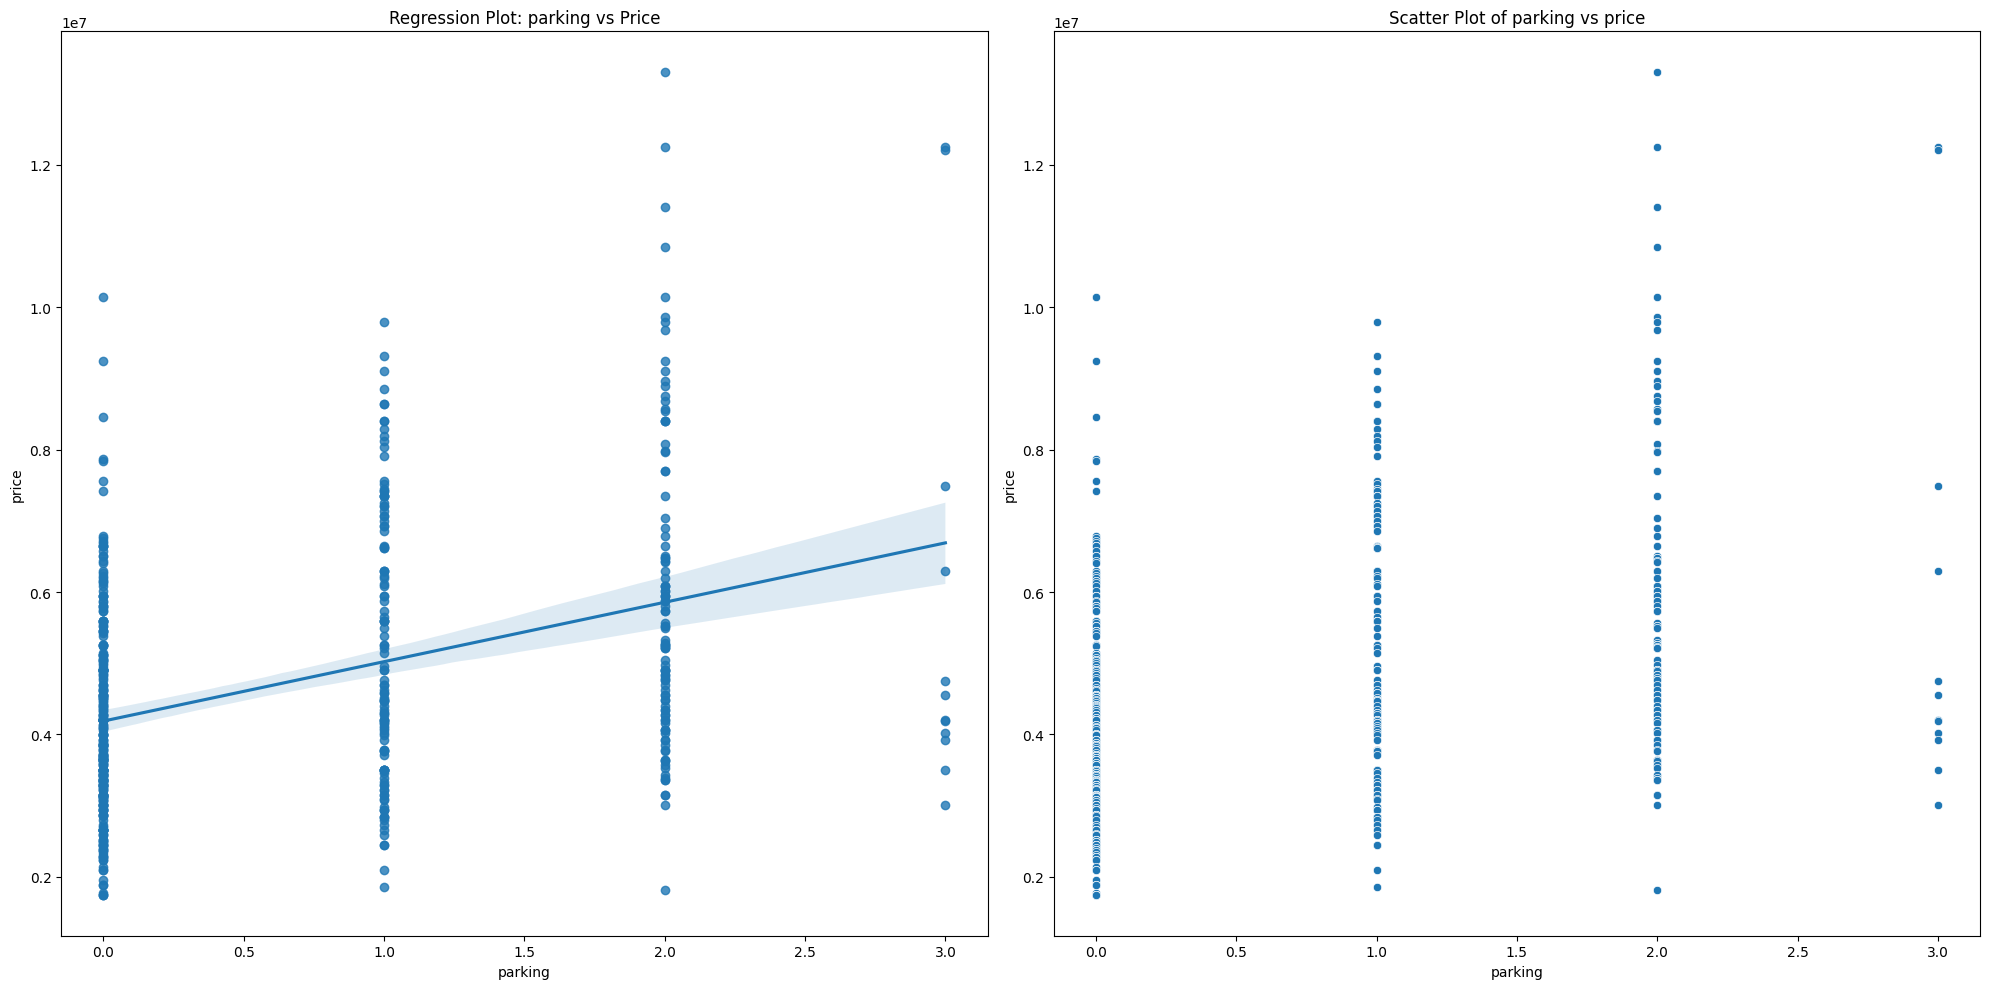

In [35]:
for col in numeric_cols[1:]:
    print(f'Bivariate analysis between {col} and price')
    bivariate_num_col(col)

In [36]:
def bivariate_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    sns.barplot(x=col, y='price', data=df, ax=ax[0])
    ax[0].set_title(f'Average Price by {col}')

    sns.boxplot(x=col, y='price', data=df, ax=ax[1])
    ax[1].set_title(f'Price Distribution by {col}')
    plt.tight_layout()
    plt.show()

Bivariate analysis between guestroom and price


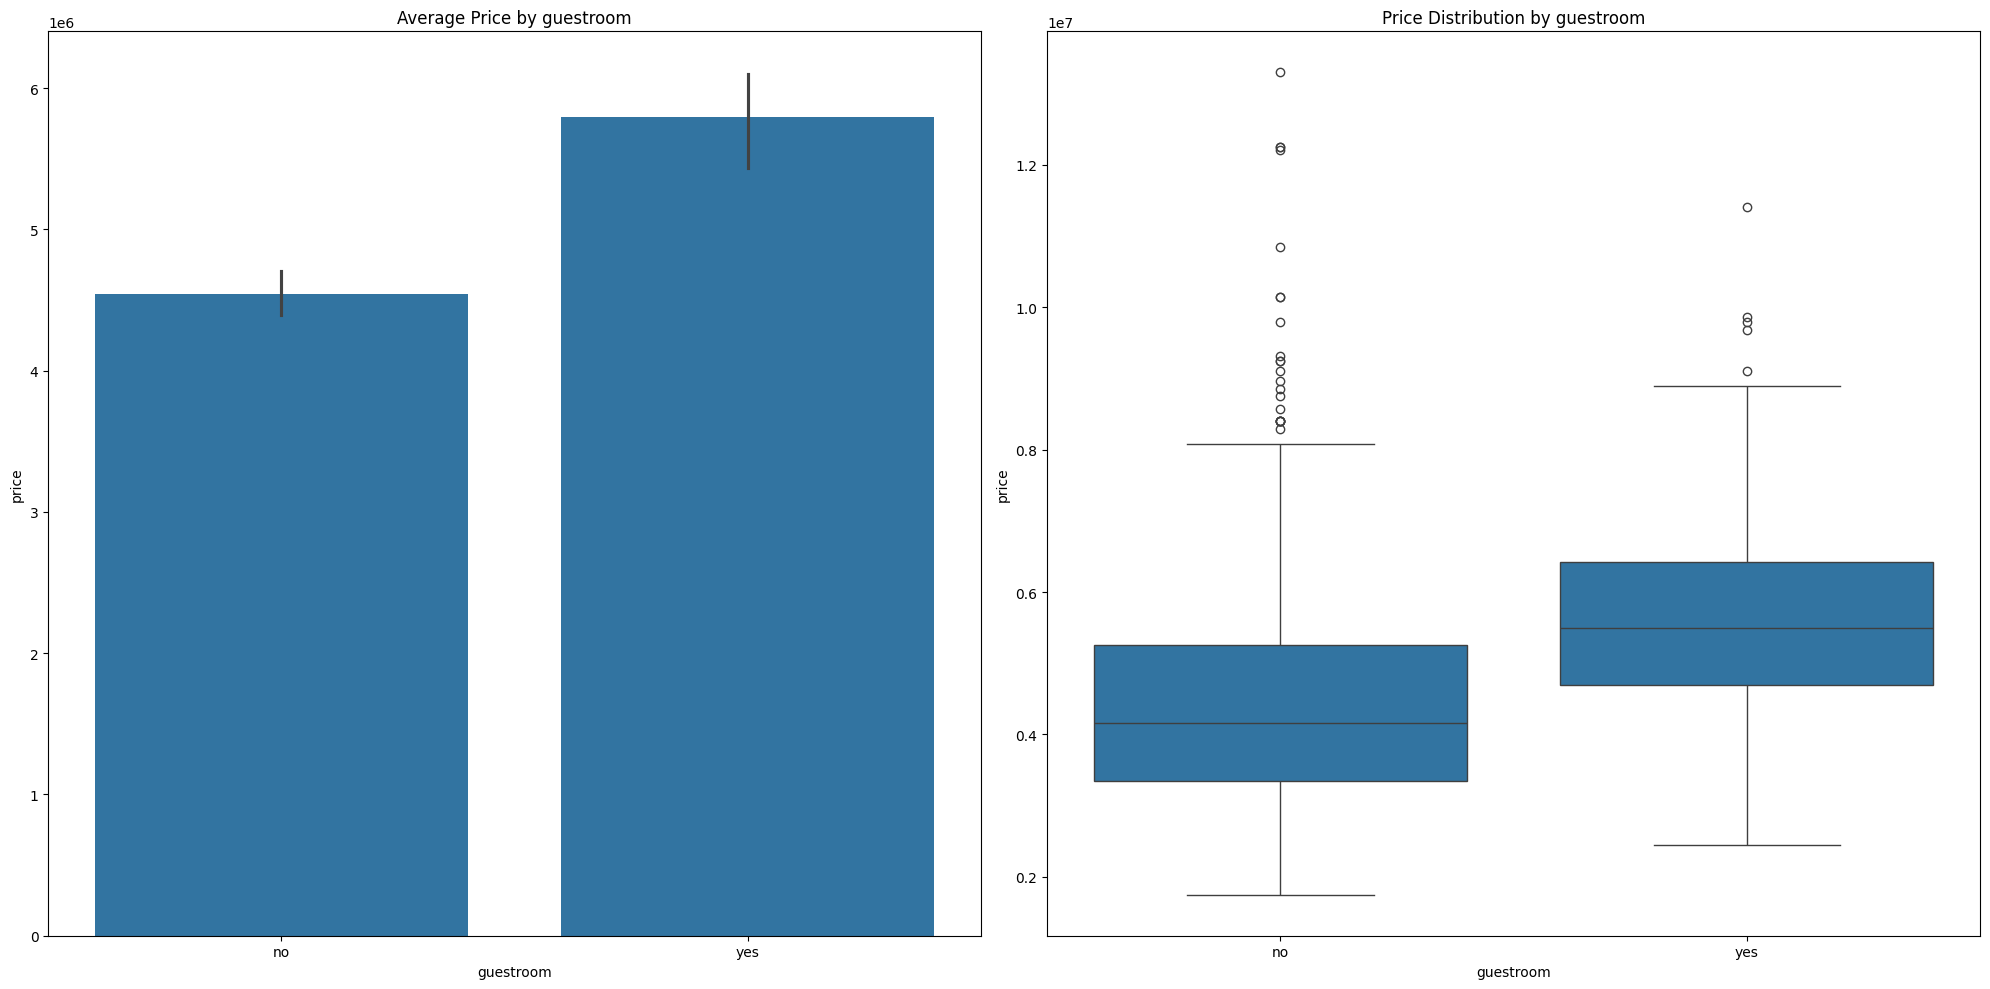

Bivariate analysis between basement and price


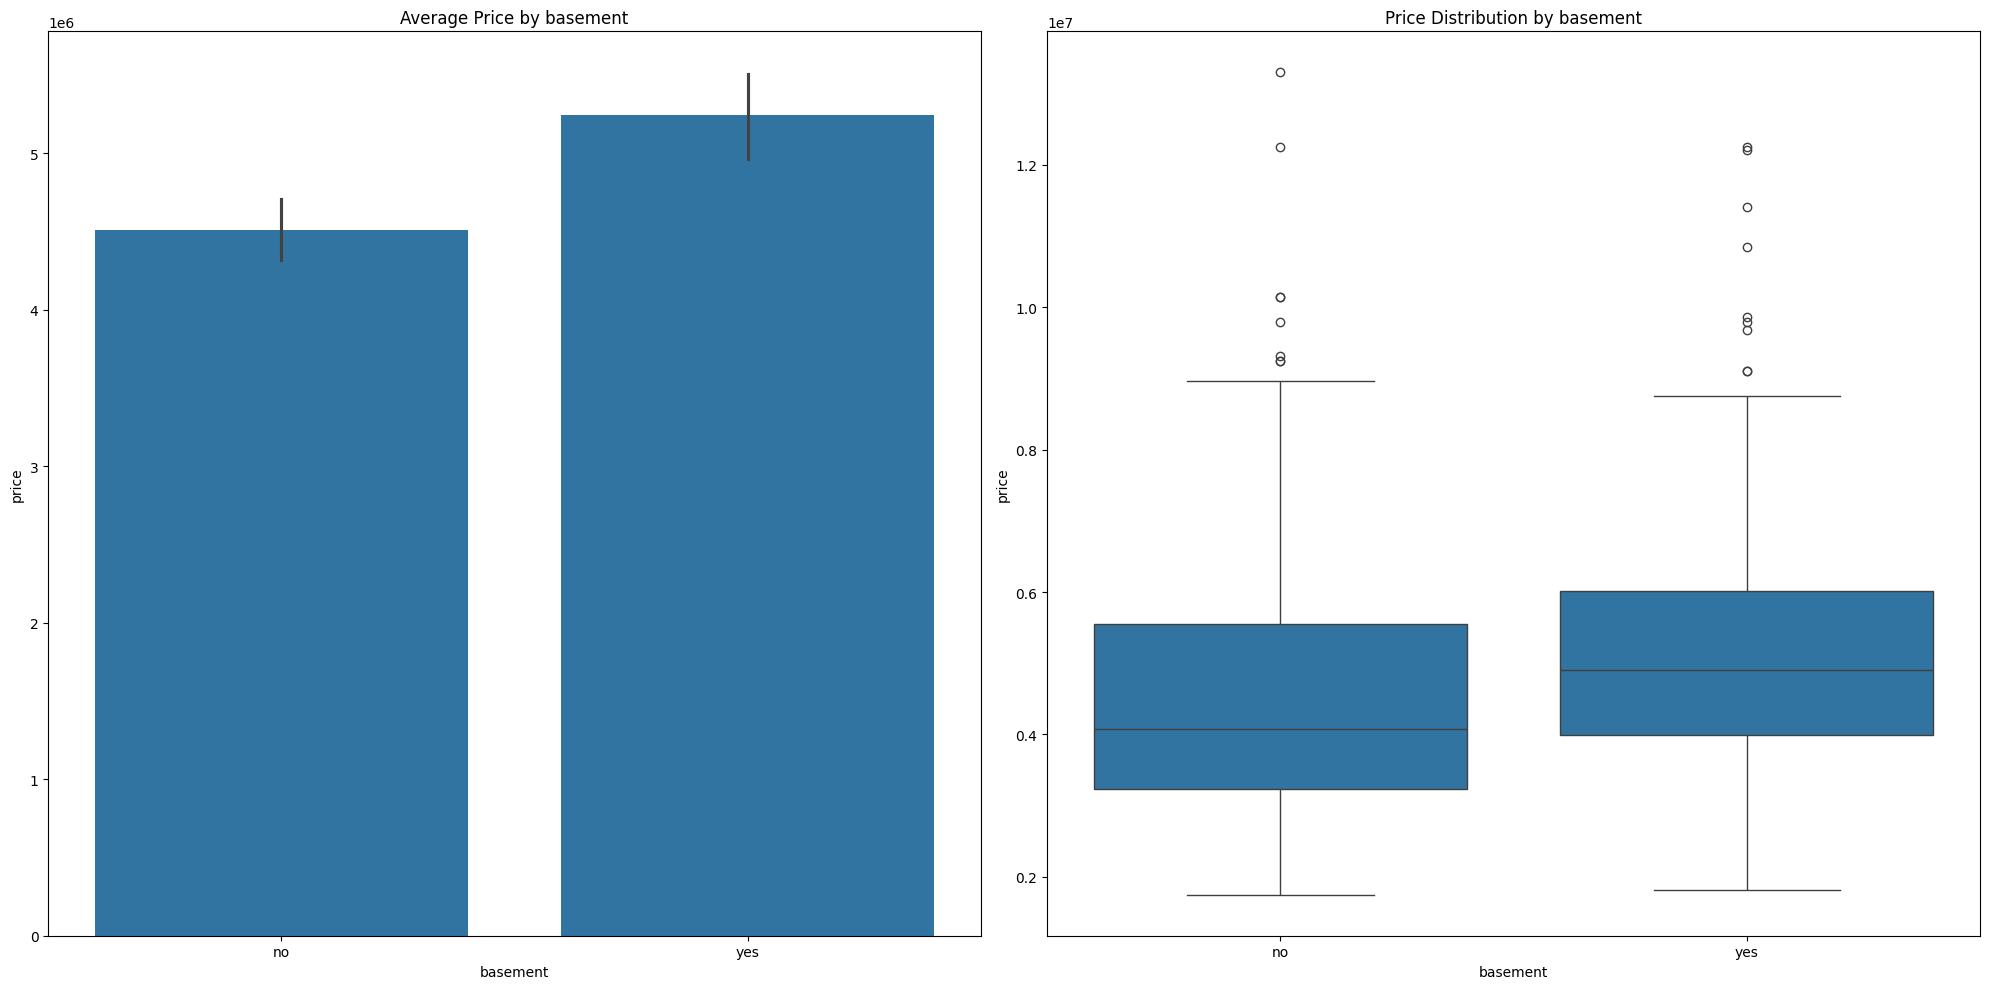

Bivariate analysis between hotwaterheating and price


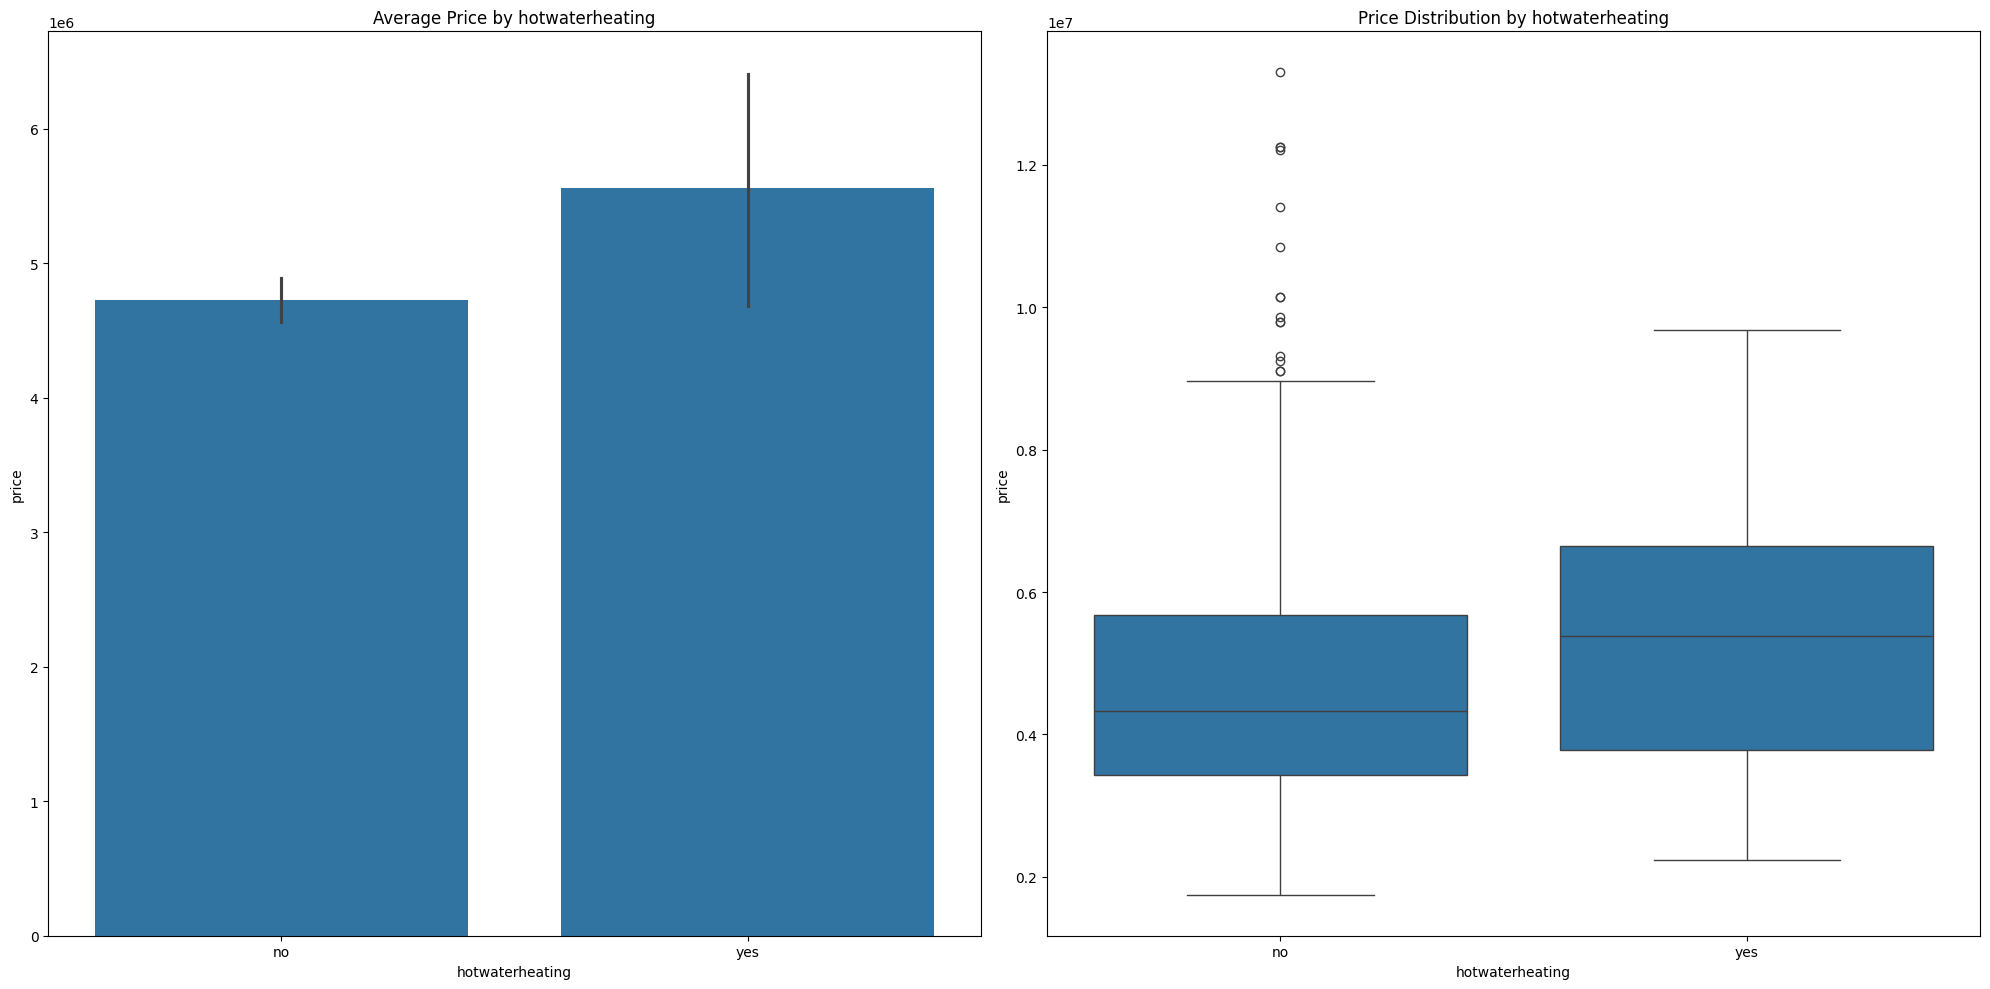

Bivariate analysis between airconditioning and price


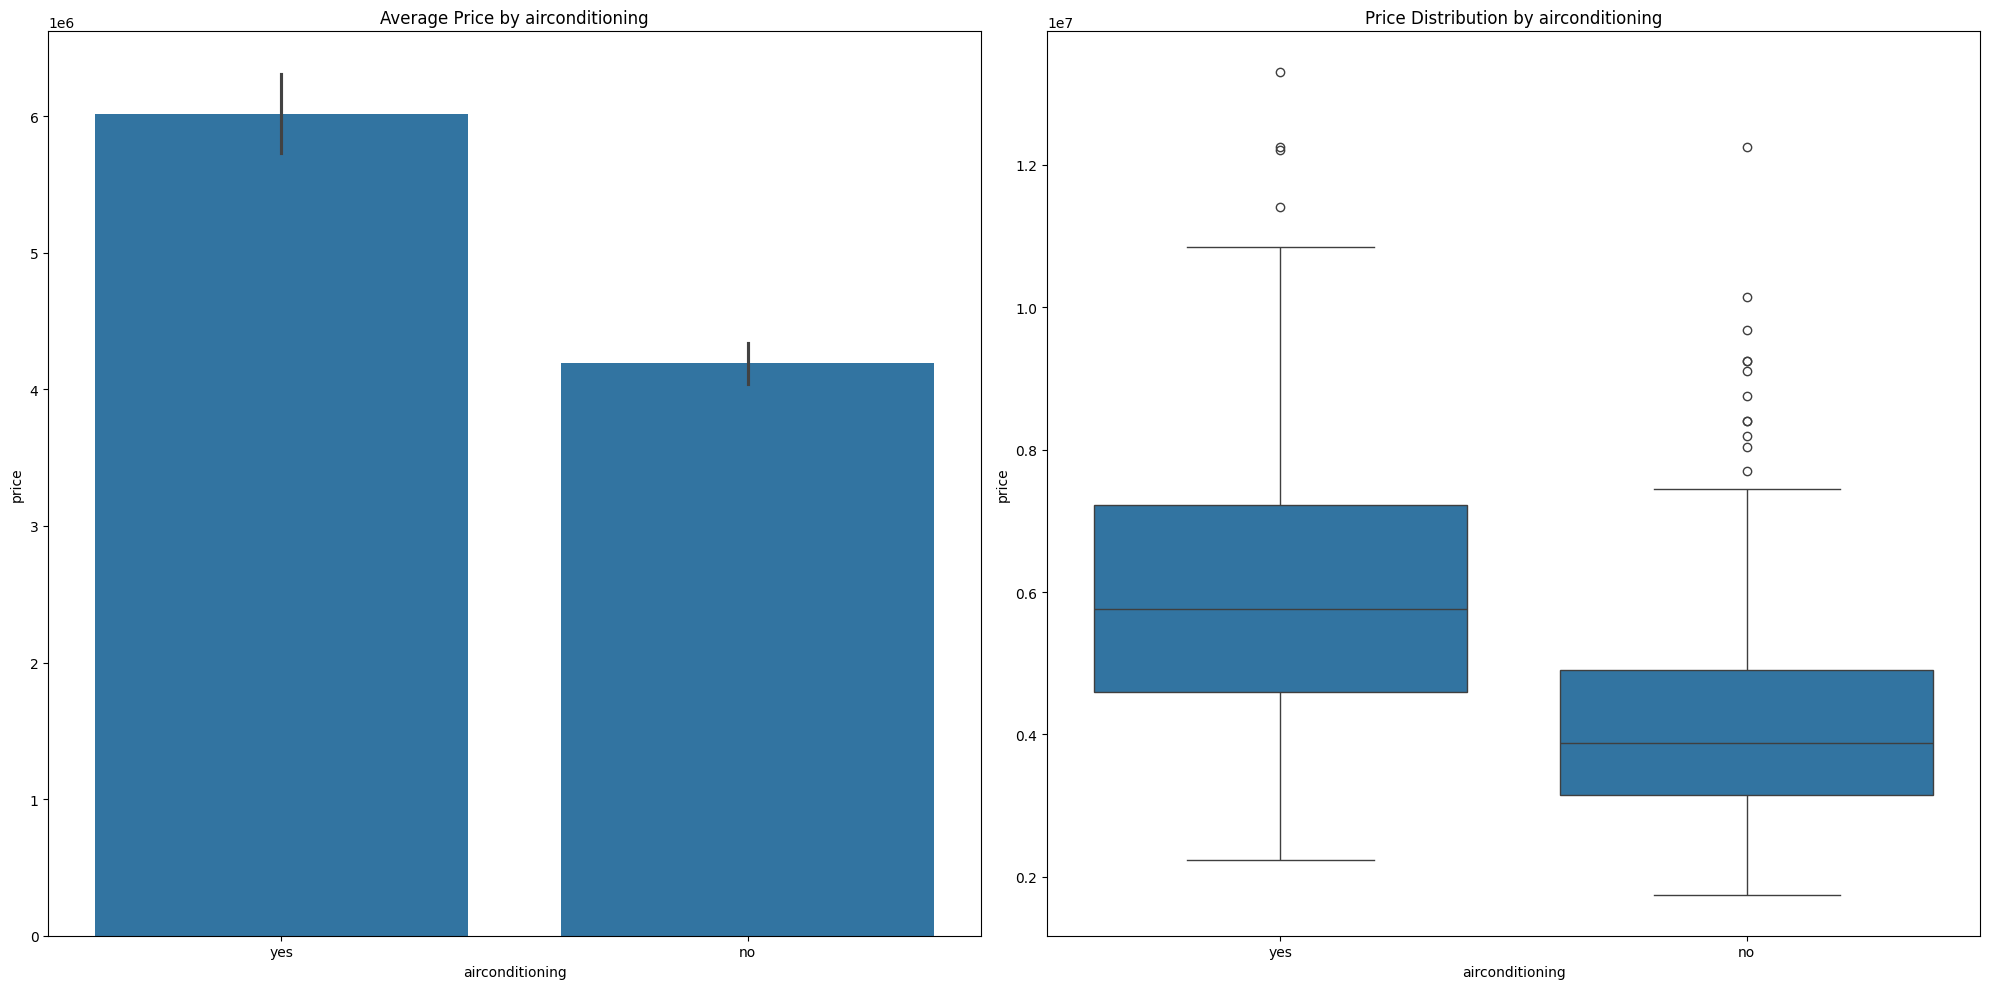

Bivariate analysis between prefarea and price


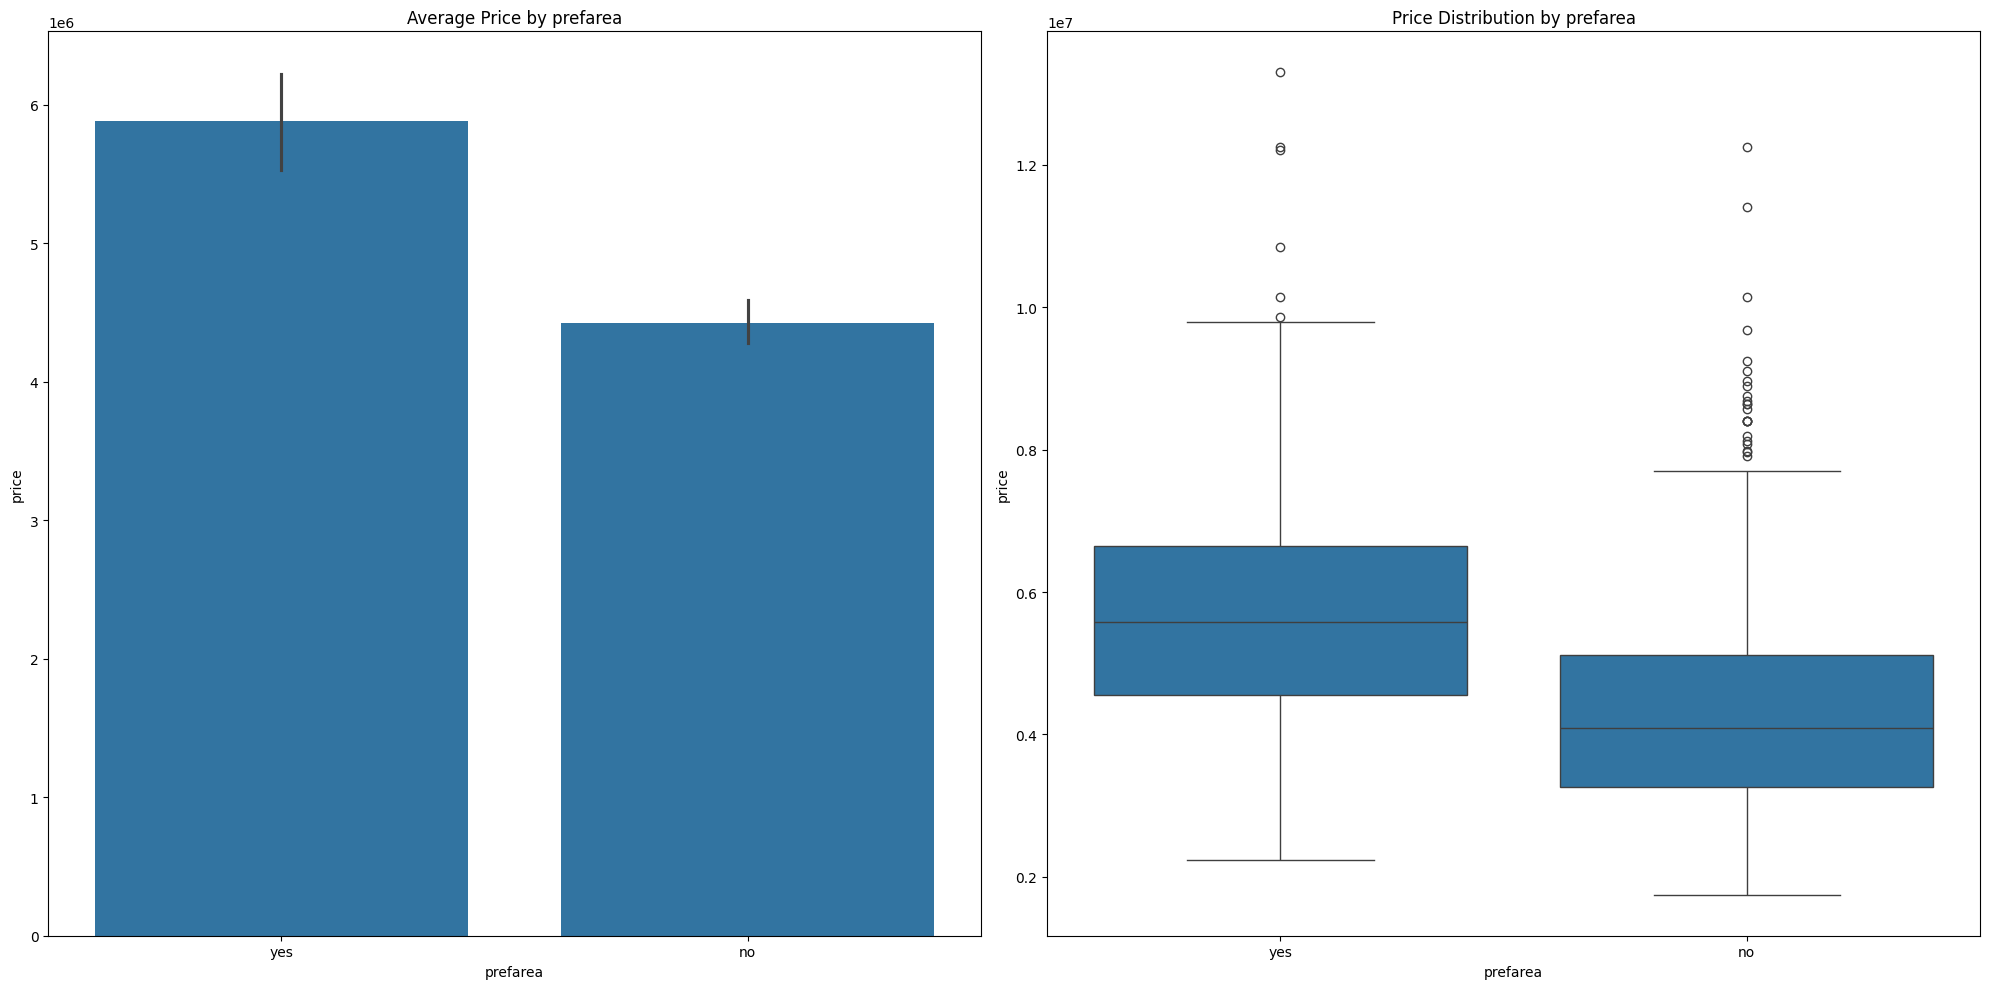

Bivariate analysis between furnishingstatus and price


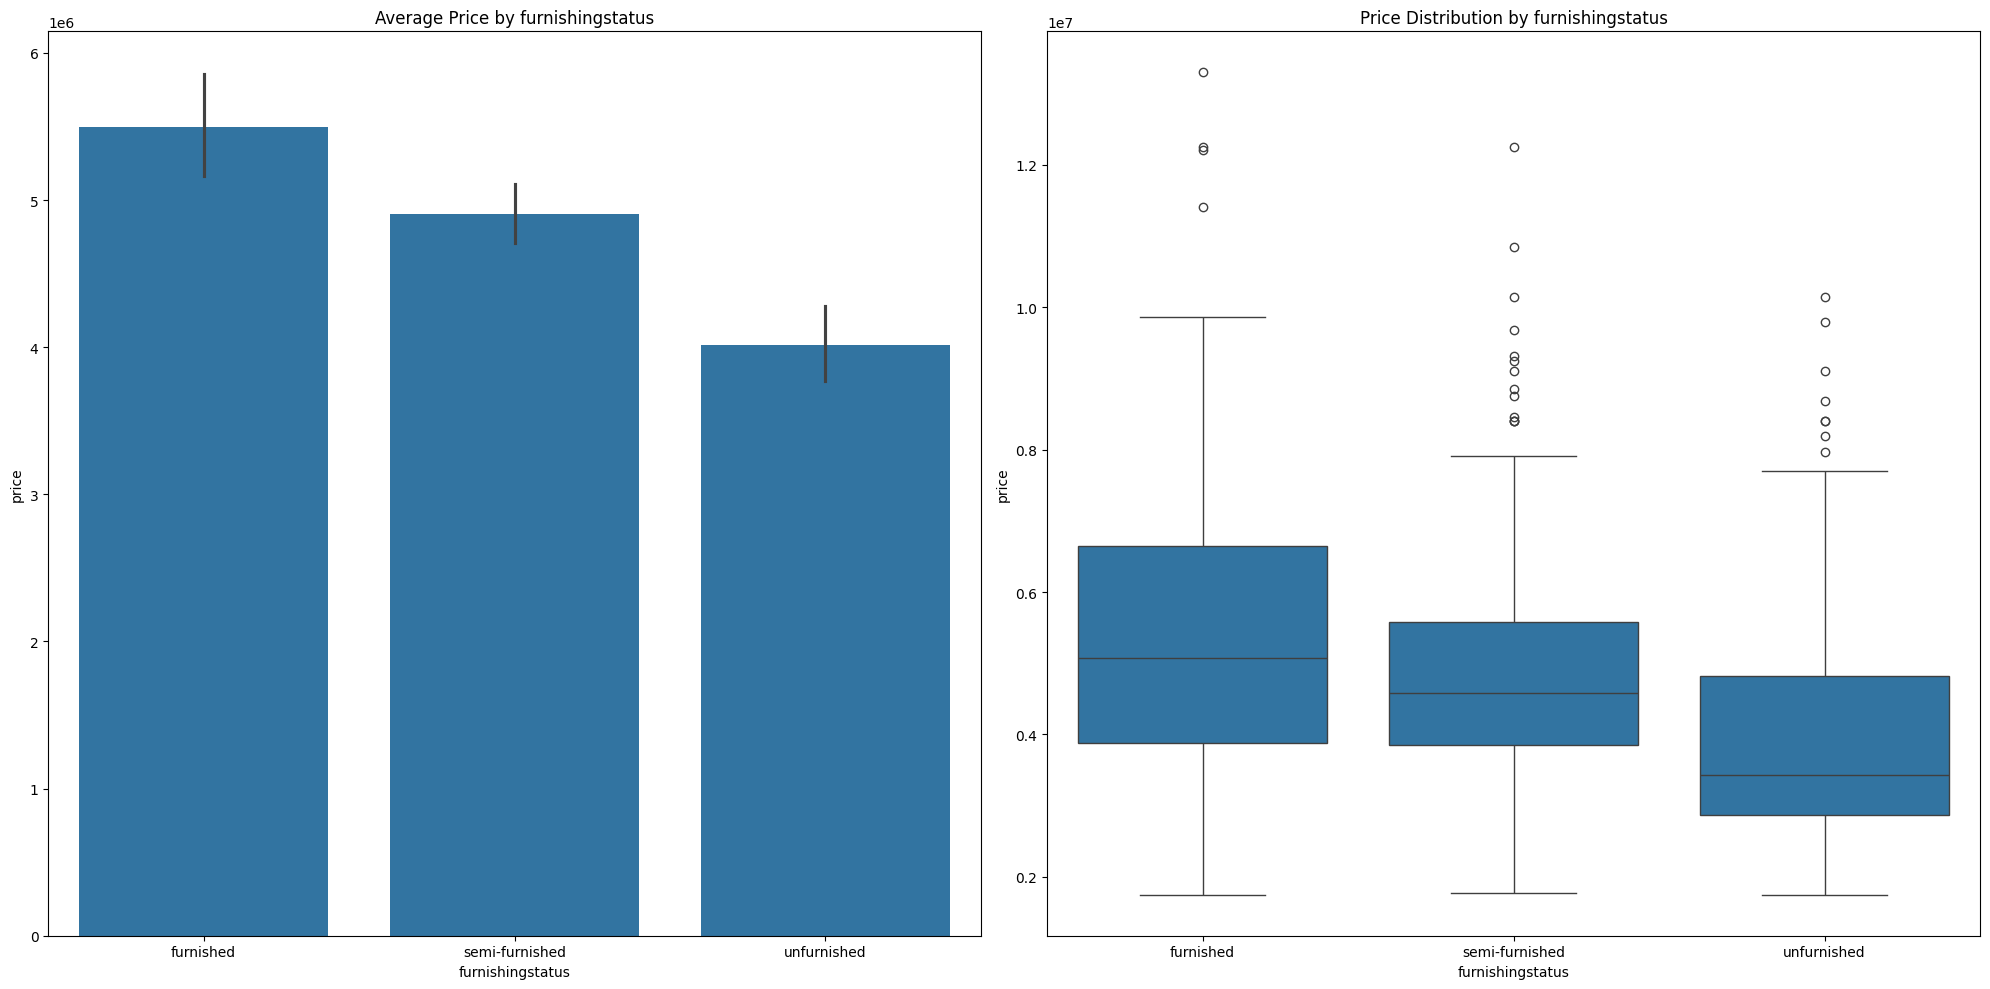

In [37]:
for col in cat_cols[1:]:
    print(f'Bivariate analysis between {col} and price')
    bivariate_cat(col)

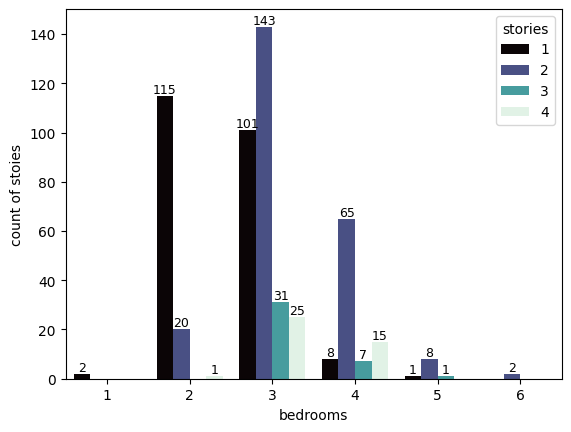

In [40]:
ax = sns.countplot(df, x="bedrooms", hue="stories",palette="mako")
for i in range(len(df['stories'].unique())):
    ax.bar_label(ax.containers[i], fontsize=9)
plt.ylabel('count of stoies')
plt.show()

<Figure size 1000x800 with 0 Axes>

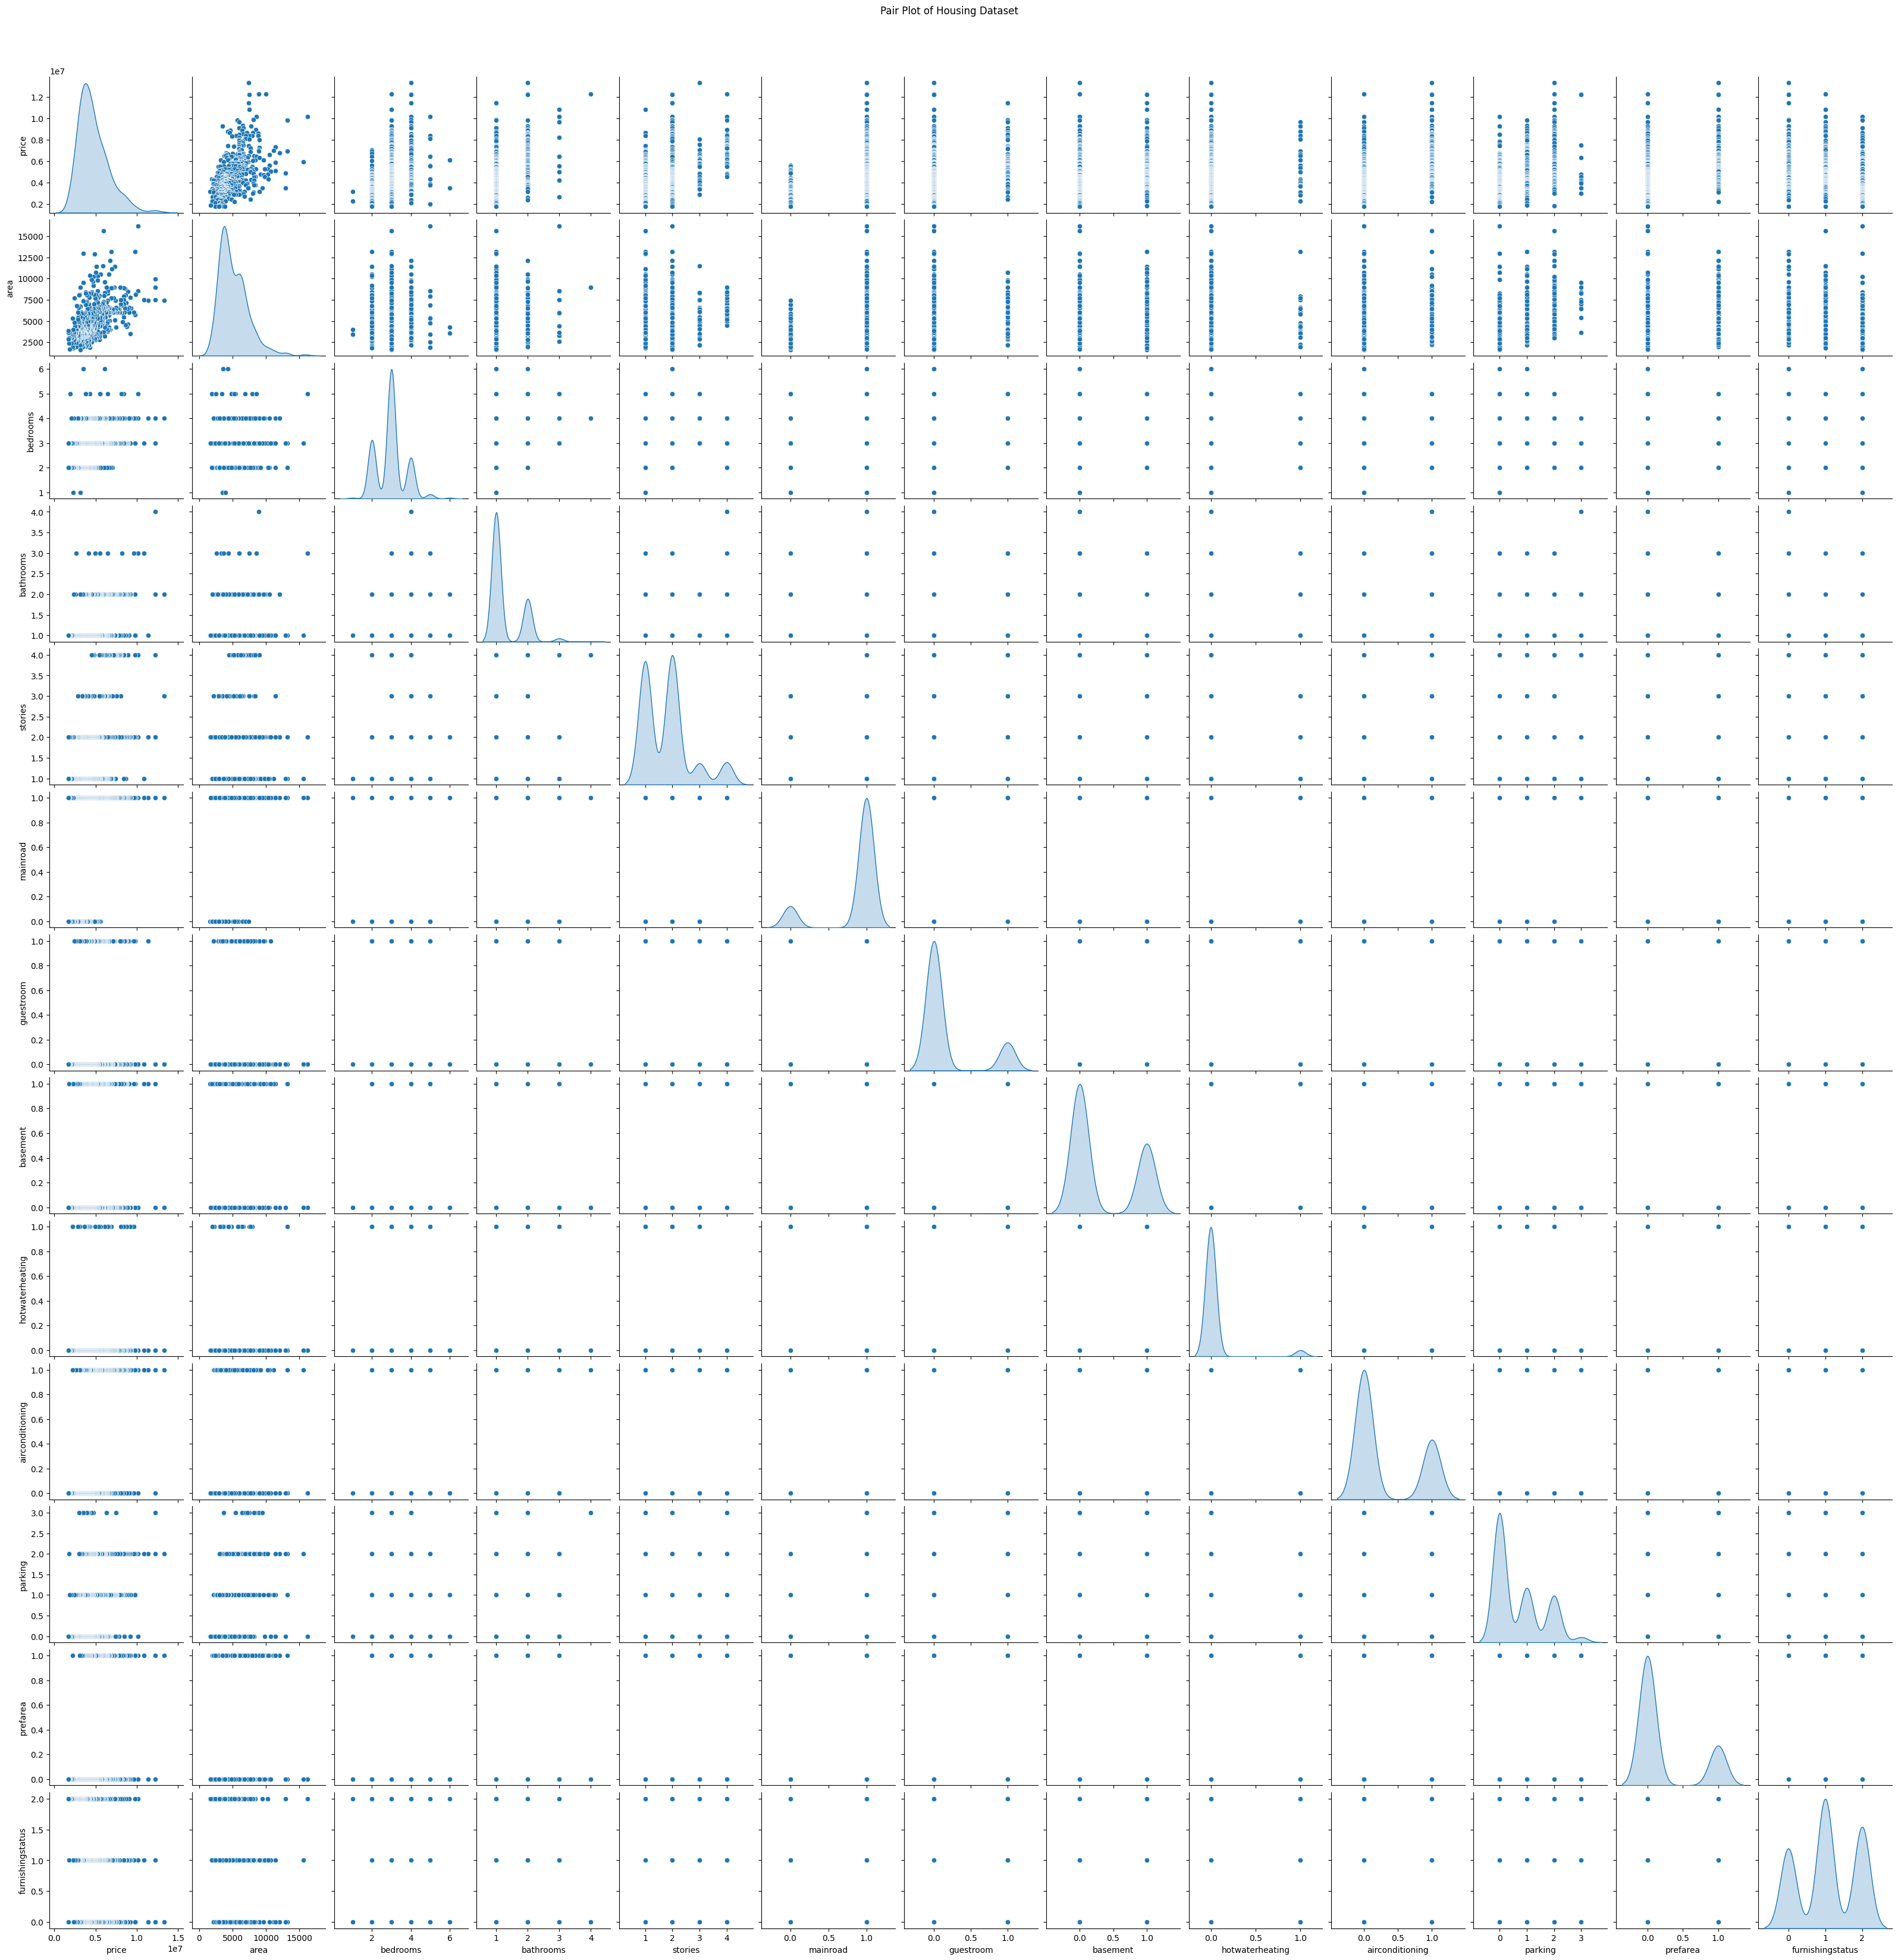

In [72]:
# Pair plot (this may take some time if dataset is large)
plt.figure(figsize=(10,8))
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Pair Plot of Housing Dataset", y=1.02)
plt.show()

In [42]:
# Handle missing values (example: fill with median for numeric, mode for categorical)
for col in df.columns:
    if df[col].dtype == "object":  # categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  # numeric
        df[col].fillna(df[col].median(), inplace=True)

In [43]:
# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = label_enc.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [44]:
print("\n===== Preprocessed Dataset =====")
display(df_scaled.head())


===== Preprocessed Dataset =====


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,-1.406286
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,-1.406286
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.091662
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,-1.406286
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,-1.406286


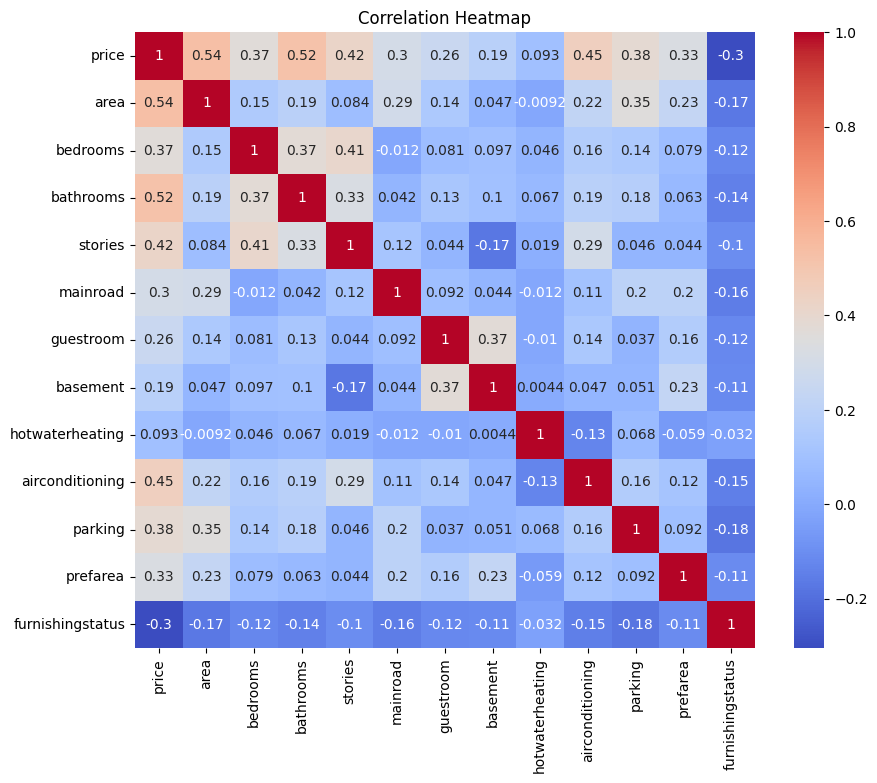

In [46]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Spliting of Data

In [47]:
# Assuming 'price' is the target column (change if different in your dataset)
target = 'price'  
X = df_scaled.drop(columns=[target])
y = df_scaled[target]

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (436, 12)
Test shape: (109, 12)


# Lineaer Regression

In [55]:
ln_model = LinearRegression()
ln_model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Initialize and fit Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n===== Model Performance =====")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


===== Model Performance =====
Mean Squared Error (MSE): 0.5074
Root Mean Squared Error (RMSE): 0.7123
R² Score: 0.6495


In [50]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
display(results.head(10))

,Actual,Predicted
316,-0.378188,0.233829
77,1.007785,1.332608
360,-0.565482,-0.911800
90,0.895409,-0.110844
493,-1.052446,-0.767260
209,0.071316,-0.644102
176,0.258610,0.470234
249,-0.119723,0.881485
516,-1.239739,-1.076081
426,-0.756522,-1.122580


In [51]:
# Import required metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on test set
y_pred = lin_reg.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("===== Model Evaluation =====")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

===== Model Evaluation =====
Mean Absolute Error (MAE): 0.5243
Mean Squared Error (MSE): 0.5074
Root Mean Squared Error (RMSE): 0.7123
R² Score: 0.6495


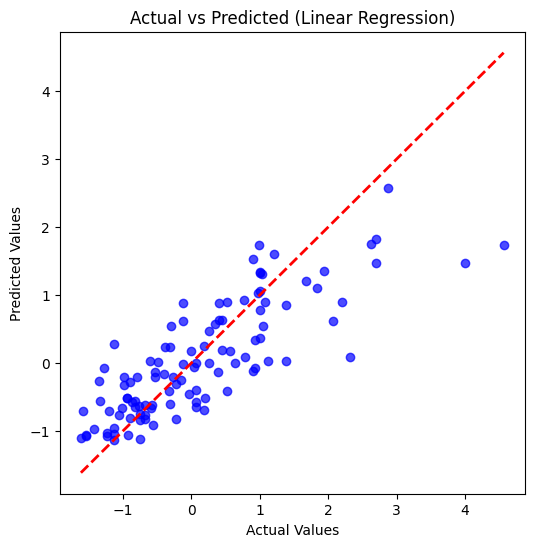

In [52]:
# Plot Actual vs Predicted values
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # regression line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


# Multiple Linear Regression

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit Multiple Linear Regression
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, y_train)

# Predictions
y_pred = lin_reg_multi.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n===== Multiple Linear Regression =====")
print("Intercept:", lin_reg_multi.intercept_)
print("Coefficients:\n", lin_reg_multi.coef_)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


# Compare Actual vs Predicted
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print("\nSample Predictions:")
print(results.head())


===== Multiple Linear Regression =====
Intercept: 4738612.162870701
Coefficients:
 [ 511355.31486431   57939.76418471  550762.10873532  352072.08634443
  127770.25363585   89178.0079421   187581.88438844  143909.24149324
  365086.93393877  194330.06533066  267023.36435044 -160043.58443798]

Mean Squared Error: 1771751116594.04
R² Score: 0.65

Sample Predictions:
      Actual     Predicted
316  4060000  5.203692e+06
77   6650000  7.257004e+06
360  3710000  3.062829e+06
90   6440000  4.559592e+06
493  2800000  3.332932e+06


In [58]:
# Coefficient interpretation
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\n===== Regression Coefficients =====")
display(coefficients)

# Interpretation
print("\nInterpretation:")
print("Positive coefficients → feature increases target (price).")
print("Negative coefficients → feature decreases target (price).")
print("Magnitude shows strength of impact on target.")


===== Regression Coefficients =====


,Feature,Coefficient
2,bathrooms,0.294726
0,area,0.273639
8,airconditioning,0.195367
3,stories,0.188403
10,prefarea,0.142891
9,parking,0.103991
6,basement,0.100380
7,hotwaterheating,0.077009
4,mainroad,0.068373
5,guestroom,0.047721



Interpretation:
Positive coefficients → feature increases target (price).
Negative coefficients → feature decreases target (price).
Magnitude shows strength of impact on target.


===== Feature Importance (Coefficients) =====
             Feature  Coefficient
2          bathrooms     0.294726
0               area     0.273639
8    airconditioning     0.195367
3            stories     0.188403
10          prefarea     0.142891
9            parking     0.103991
6           basement     0.100380
7    hotwaterheating     0.077009
4           mainroad     0.068373
5          guestroom     0.047721
1           bedrooms     0.031005
11  furnishingstatus    -0.085643


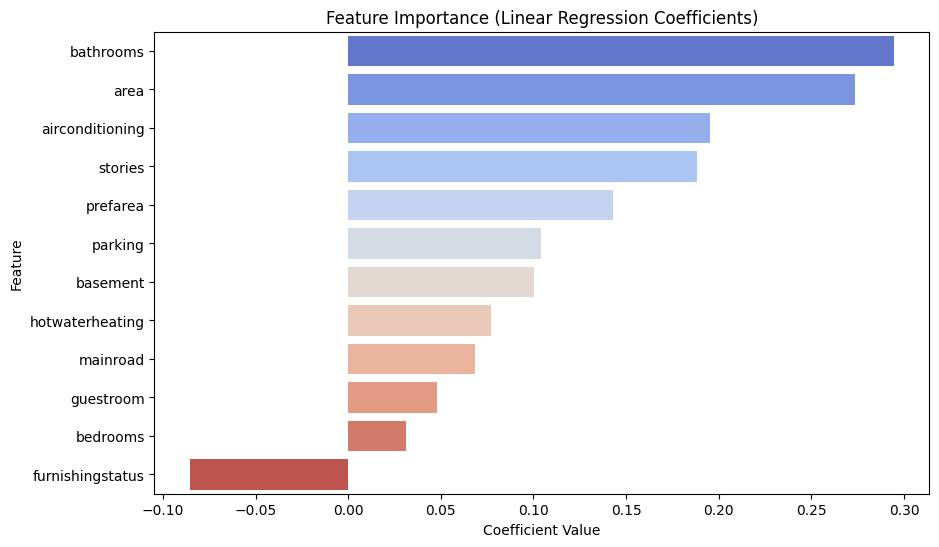

In [59]:
# Coefficients DataFrame
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lin_reg_multi.coef_
}).sort_values(by="Coefficient", ascending=False)

print("===== Feature Importance (Coefficients) =====")
print(coefficients)

# Bar plot of coefficients
plt.figure(figsize=(10,6))
sns.barplot(x="Coefficient", y="Feature", data=coefficients, palette="coolwarm")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


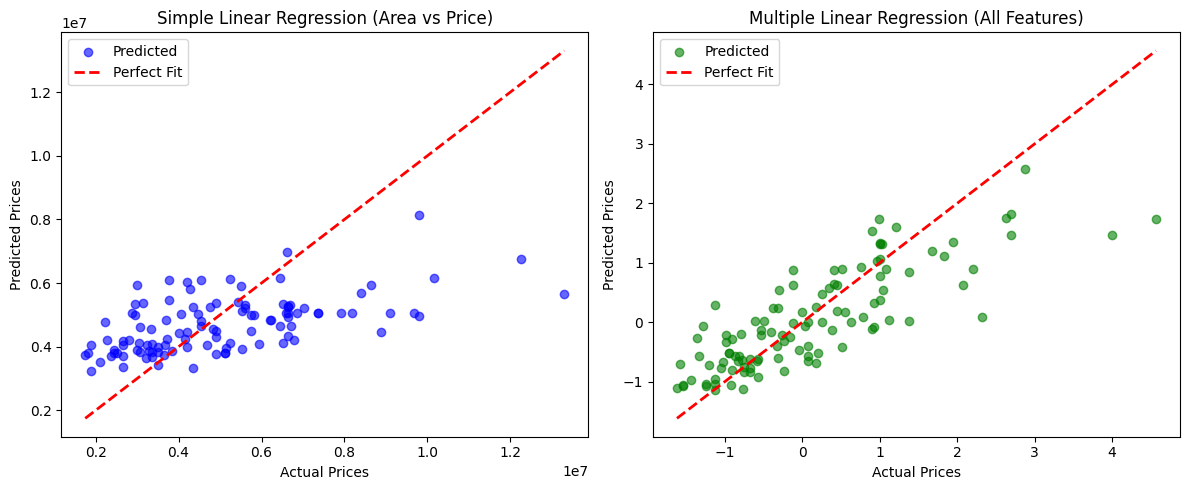

In [60]:
# Simple Linear Regression (using 'area')
X_simple = df[['area']]
y = df['price']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

lin_reg_simple = LinearRegression()
lin_reg_simple.fit(X_train_s, y_train_s)
y_pred_s = lin_reg_simple.predict(X_test_s)

# Multiple Linear Regression (already fitted above)
y_pred_m = lin_reg_multi.predict(X_test)

# Plot comparison
plt.figure(figsize=(12,5))

# Plot Simple Regression
plt.subplot(1,2,1)
plt.scatter(y_test_s, y_pred_s, color="blue", alpha=0.6, label="Predicted")
plt.plot([y_test_s.min(), y_test_s.max()],
         [y_test_s.min(), y_test_s.max()],
         'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Simple Linear Regression (Area vs Price)")
plt.legend()

# Plot Multiple Regression
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_m, color="green", alpha=0.6, label="Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2, label="Perfect Fit")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Multiple Linear Regression (All Features)")
plt.legend()

plt.tight_layout()
plt.show()


In [61]:


# ==== Simple Linear Regression (Area only) ====
mae_s = mean_absolute_error(y_test_s, y_pred_s)
mse_s = mean_squared_error(y_test_s, y_pred_s)
rmse_s = np.sqrt(mse_s)
r2_s = r2_score(y_test_s, y_pred_s)

# ==== Multiple Linear Regression (All features) ====
mae_m = mean_absolute_error(y_test, y_pred_m)
mse_m = mean_squared_error(y_test, y_pred_m)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test, y_pred_m)

# Comparison Table
comparison = pd.DataFrame({
    "Model": ["Simple Linear Regression", "Multiple Linear Regression"],
    "MAE": [mae_s, mae_m],
    "MSE": [mse_s, mse_m],
    "RMSE": [rmse_s, rmse_m],
    "R² Score": [r2_s, r2_m]
})

print("===== Model Performance Comparison =====")
display(comparison)


===== Model Performance Comparison =====


,Model,MAE,MSE,RMSE,R² Score
0,Simple Linear Regression,1.474748e+06,3.675287e+12,1.917104e+06,0.272879
1,Multiple Linear Regression,5.242509e-01,5.073562e-01,7.122894e-01,0.649475


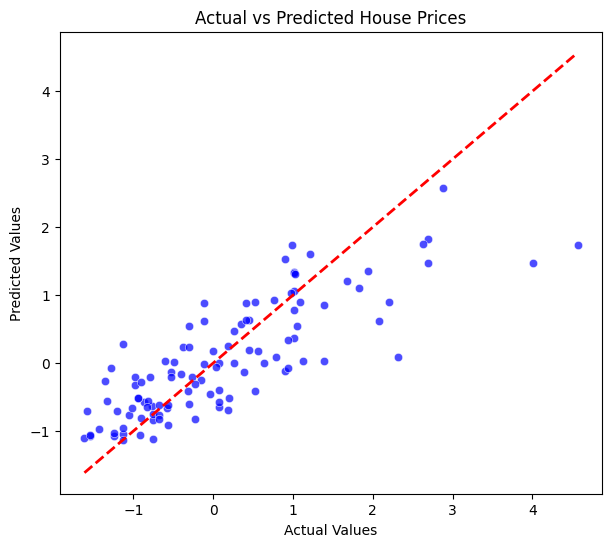

In [62]:
# 1. Actual vs Predicted scatter plot
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.show()

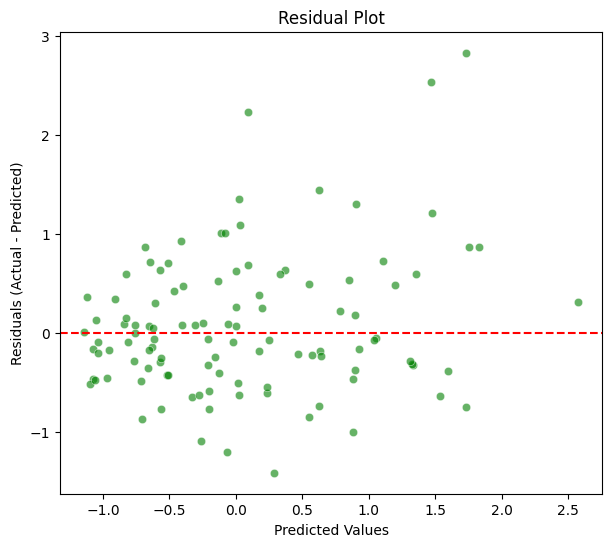

In [63]:
# 2. Residual Plot (Errors)
residuals = y_test - y_pred
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

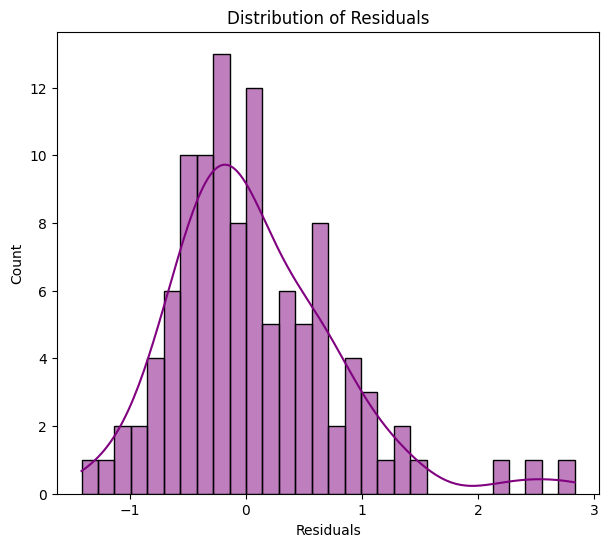

In [64]:
# 3. Distribution of Residuals
plt.figure(figsize=(7,6))
sns.histplot(residuals, kde=True, color="purple", bins=30)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

In [74]:
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Evaluate Model
y_pred = model.predict(X_test)
print("Model R² Score:", r2_score(y_test, y_pred))


Model R² Score: 0.6494754192267794
